In [1]:
import pandas as pd
import numpy as np
import gzip
import logging
import yaml
import codecs
global lcode
import re
import sys
from collections import Counter
from nltk import word_tokenize
import nltk
import spacy

import os
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections

#import tweepy as tw
from nltk.corpus import stopwords
import networkx

import warnings
warnings.filterwarnings("ignore")

sns.set(font_scale=1.5)
sns.set_style("whitegrid")

Corpora
http://www.nltk.org/nltk_data/

nltk.download() o python -m nltk.downloader all (consola)

In [2]:
dateparse = lambda dates: [pd.datetime.strptime(d, '%Y-%m-%d %H:%M:%S') for d in dates]

In [3]:
col_names = ["col1", "col2", "col3", "tweet", "via", "id", "followers", "following", "statuses", "loc", "col11", "col12", "col13",
            "col14", "col15", "col16", "col17", "col18", "col19", "col20", "col21", "col22", "col23", "col24", "col25",
            "col26","col27", "col28", "col29", "col30"]

df3 = pd.read_csv('/Users/cxb0266/Desktop/odio_politicas/streaming_odio_politicas_3.txt', sep= "\t",
                  names=col_names, encoding='utf-8')


In [4]:
df0 = pd.read_csv('/Users/cxb0266/Desktop/odio_politicas/streaming_odio_politicas_0.txt', sep= "\t",
                  names=col_names, encoding='utf-8')

In [5]:
df1 = pd.read_csv('/Users/cxb0266/Desktop/odio_politicas/streaming_odio_politicas_1.txt', sep= "\t",
                  names=col_names, encoding='utf-8')

In [6]:
df2 = pd.read_csv('/Users/cxb0266/Desktop/odio_politicas/streaming_odio_politicas_2.txt', sep= "\t",
                  names=col_names, encoding='utf-8')

In [7]:
df4 = pd.read_csv('/Users/cxb0266/Desktop/odio_politicas/streaming_odio_politicas_4.txt', sep= "\t",
                  names=col_names, encoding='utf-8')

In [8]:
df5 = pd.read_csv('/Users/cxb0266/Desktop/odio_politicas/streaming_odio_politicas_5.txt', sep= "\t",
                  names=col_names, encoding='utf-8')

In [9]:
df6 = pd.read_csv('/Users/cxb0266/Desktop/odio_politicas/streaming_odio_politicas_6.txt', sep= "\t",
                  names=col_names, encoding='utf-8')

In [10]:
df7 = pd.read_csv('/Users/cxb0266/Desktop/odio_politicas/streaming_odio_politicas_7.txt', sep= "\t",
                  names=col_names, encoding='utf-8')

In [11]:
df8 = pd.read_csv('/Users/cxb0266/Desktop/odio_politicas/streaming_odio_politicas_8.txt', sep= "\t",
                  names=col_names, encoding='utf-8')

In [13]:
frames = [df0, df1, df2, df3, df4, df5, df6, df7, df8]
tweets=pd.concat(frames)

In [270]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1169512 entries, 0 to 121953
Data columns (total 34 columns):
col1         1169512 non-null object
col2         1169512 non-null object
col3         1169512 non-null object
tweet        1169512 non-null object
via          1169512 non-null object
id           1169512 non-null object
followers    1169512 non-null object
following    1169512 non-null object
statuses     1169512 non-null object
loc          1169512 non-null object
col11        1169512 non-null object
col12        1169512 non-null object
col13        1169512 non-null object
col14        1169512 non-null object
col15        1169512 non-null object
col16        1169512 non-null object
col17        1169512 non-null object
col18        1169512 non-null object
col19        1169512 non-null object
col20        1169512 non-null object
col21        1169512 non-null object
col22        1169512 non-null object
col23        1169512 non-null object
col24        1169512 non-null object


DataSets unidos. Tokenizar, palabras stop

In [14]:
tweets=tweets.astype(str)

In [ ]:
pd.set_option('display.max_colwidth', -1)

In [84]:
tweets.head()

,col1,col2,col3,tweet,via,id,followers,following,statuses,loc,...,col21,col22,col23,col24,col25,col26,col27,col28,col29,col30
0,1147190909345456130,2019-07-05 17:10:01,@mikemit87350572,@InesArrimadas Si quieres los votos de VOX vas te reúnes y los negocias. No los insultas y tratas de chantajearlos. También podéis apoyar Cs un gobierno PP-vox. Ponte un círculo multicolor y a haceros los progres. Si os van a llamar fachas igual. Susana Díaz PSOE gobernaba con vuestros apoyo,via=Twitter for Android,id=1073287763150155776,followers=22,following=50,statuses=1083,loc=None,...,None,None,None,None,None,es,2018-12-13 18:45:18,False,https://pbs.twimg.com/profile_images/1073288176251400193/jXfeeYHk_normal.jpg,https://twitter.com/mikemit87350572/status/1147190909345456130
1,1147190998344327168,2019-07-05 17:10:22,@DulantziNabar,"RT @Irene_Montero_: En Unidas Podemos todos somos independientes de los fondos buitre, de las eléctricas, de la CEOE. Aportamos esa garantía para crear empleo estable, regular el precio del alquiler o bajar la factura de la luz. España necesita un Gobierno de coalición progresista, y los números dan https://t.co/ZPSfACQf6t",via=Twitter for Android,id=873599918878973952,followers=2028,following=1911,statuses=17637,loc=Bilbao,...,1147135545413439488,Irene_Montero_,None,None,None,es,2017-06-10 17:57:06,False,https://pbs.twimg.com/profile_images/1146523315667898380/XrHB-YGb_normal.jpg,https://twitter.com/DulantziNabar/status/1147190998344327168
2,1147190999225122817,2019-07-05 17:10:22,@CdpdDavid,RT @InesArrimadas: Sánchez ya ha elegido a sus socios nacionalistas y populistas. Lo ha hecho hoy mismo en Navarra y allí donde ha podido en toda España. Este artículo desmonta el mantra sanchista que busca hacer responsables a los demás del error histórico de este PSOE👇🏻 https://t.co/oWygbg7o2O,via=Twitter for Android,id=3248003764,followers=1354,following=1498,statuses=66024,loc=None,...,1147137586550493186,InesArrimadas,None,None,None,es,2015-05-12 14:24:08,False,https://pbs.twimg.com/profile_images/746432913147760640/B--25xgg_normal.jpg,https://twitter.com/CdpdDavid/status/1147190999225122817
3,1147191001280372736,2019-07-05 17:10:23,@Reinaraf1962,"RT @Irene_Montero_: En Unidas Podemos todos somos independientes de los fondos buitre, de las eléctricas, de la CEOE. Aportamos esa garantía para crear empleo estable, regular el precio del alquiler o bajar la factura de la luz. España necesita un Gobierno de coalición progresista, y los números dan https://t.co/ZPSfACQf6t",via=Twitter for iPhone,id=2975012789,followers=29,following=65,statuses=7757,loc=None,...,1147135545413439488,Irene_Montero_,None,None,None,es,2015-01-12 17:35:16,False,https://pbs.twimg.com/profile_images/555795320274427904/DbBg9z_V_normal.jpeg,https://twitter.com/Reinaraf1962/status/1147191001280372736
4,1147191021652066307,2019-07-05 17:10:27,@juannquillo,@sanchezcastejon Lo que España necesita es de políticos que cumplan lo que prometieron y políticos que sean agradecidos con quiénes le pusieron en el cargo que ocupa.,via=Twitter for Android,id=301353218,followers=50,following=171,statuses=3416,loc=None,...,None,None,None,None,None,es,2011-05-19 09:58:20,False,https://pbs.twimg.com/profile_images/560476623276093440/m95iOr-f_normal.jpeg,https://twitter.com/juannquillo/status/1147191021652066307


In [15]:
#Crear una nueva columa RT. Si es RT devulve 1 sino 0
new = tweets["tweet"].str.split("@", n = 1, expand = True) 

tweets["RT"]= new[0] 

tweets["tw"]= new[1]

In [ ]:
tweets['RT']=tweets['RT'].replace({'':0, 'RT ':1})

### Prueba: Numero de palabras en politicas_8

In [86]:
words = Counter()
with open('/Users/cxb0266/Desktop/odio_politicas/streaming_odio_politicas_8.txt') as fin:
    words.update(word_tokenize(fin.read().lower()))

In [87]:
print('There are ' + str(sum(words.values())) + ' total words.')

There are 11851987 total words.


In [88]:
print('There are ' + str(len(words)) + ' unique words.')

There are 671197 unique words.


## Limpieza de datos

In [16]:
def  clean_text(df):
    df = df.str.lower()
    df = df.apply(lambda elem: " ".join(re.sub("á", "a", elem).split()))
    df = df.apply(lambda elem: " ".join(re.sub("é", "e", elem).split()))
    df = df.apply(lambda elem: " ".join(re.sub("í", "i", elem).split()))
    df = df.apply(lambda elem: " ".join(re.sub("ó", "o", elem).split()))
    df = df.apply(lambda elem: " ".join(re.sub("ú", "u", elem).split()))
    df = df.apply(lambda elem: " ".join(re.sub("ñ", "n", elem).split()))
    df = df.apply(lambda elem: " ".join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|http.+?|^rt", " ", elem).split()))
    return df
tweets['tweet']=clean_text(tweets['tweet'])

Separar del tweet a quien va dirigido.

In [18]:
newt = tweets["tw"].str.split(" ", n = 1, expand = True) 

tweets["Dir"]= newt[0] 

tweets["tw2"]= newt[1]

tweets.drop(columns =["tw"], inplace = True)
tweets.drop(columns =["tw2"], inplace = True)

Stop words

In [21]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words_set = set(stopwords.words("spanish"))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/cxb0266/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [22]:
stop_words=list(stop_words_set)

Stop words sin acentos, hemos quitado los acentos de todos los tweets. Se envita confusión por faltas de ortografía 

In [24]:
stop_words_mak=['tiene','vuestra','habiendo','han','tendremos','tenemos','hubisteis','hayas',
 'habian','seas','muy','se','tienes','habidos','mia','tuviste','tengas','contra','tuvieseis',
 'habiais','he','estariamos','estuvieron','para','fui','has','al','era','tenidos','nada',
 'estados','tuvieran','teneis','sentidas','fueran','estare','en','sois','que','estuvieras',
 'tendras','tuvieses','estado','erais','sus','si','seais','estuvieramos','hubimos','tuyas',
 'esteis','quienes','ella','todos','sea','fueses','otra','tenido','mios','del','sean','tenia',
 'mas','tambien','fueseis','ni','vuestro','habiamos','fueras','tu','que','sentida','antes',
 'y','hube','tendrian','tu','estarian','este','tuvierais','os','tendre','no','fueramos','vosotras',
 'ti','tendrias','seran','habriais','esta','estos','lo','estuviesemos','hubieses','eres',
 'nuestra','hayamos','estaras','la','estamos','habria','somos','tendran','yo','habras','habra',
 'seria','hay','poco','tendriamos','por','el','pero','habrias','estuviste','sobre','otro',
 'estaran','habeis','esos','tuvieron','hayais','cuando','estadas','estuvo','tenias','estemos',
 'sintiendo','teniamos','habias','tuvo','hubiese','ha','vuestras','son','esto','nosotros',
 'estaba','como','habre','habreis','mucho','habrian','vosotros','eras','fue','sentid','sera',
 'mi','estas','ante','es','tuvieramos','mias','me','hubieras','tenian','esta','estuvieses',
 'hubiesemos','tuve','fuese','estuvierais','los','hubieron','desde','fuiste','cual','estuve',
 'tus','mis','ya','nuestros','tuviese','donde','su','eran','ese','serias','habidas','durante',
 'habran','tengamos','tuvimos','le','estaban','seamos','estarias','un','algo','tengan','sereis',
 'estabamos','tuviesemos','estara','hubieseis','serian','seriais','tenida','estabais','estuvimos',
 'estuviesen','mio','fueron','siente','ellos','e','suya','estuviese','estuvieran','nosotras',
 'estuvieseis','o','tienen','las','habriamos','estuviera','tengo','estando','muchos','tenidas',
 'tendra','estaremos','el','hubo','estaria','sere','a','vuestros','hubierais','suyo','tuvisteis',
 'otros','tuvieras','eramos','estes','habido','estoy','suyas','estabas','fuerais','algunas',
 'esten','soy','otras','tanto','estariais','estareis','hasta','habremos','esa','hayan','mi',
 'eso','quien','tened','estan','tuya','hubieran','entre','seriamos','unos','hubiera','porque',
 'algunos','estas','fuera','estar','habida','fuesen','tendreis','con','tengais','suyos',
 'este','estad','fuisteis','sentido','todo','hubieramos','estuvisteis','sin','seremos','tuyos',
 'de','uno','les','nuestro','sentidos','teniais','hubiesen','hubiste','tuviesen','esas','tendria',
 'seras','teniendo','estais','te','tuyo','fuimos','haya','fuesemos','habia','nuestras','tenga',
 'una','tendriais','tuviera','hemos','nos','ellas','estada']

In [27]:
stop_words

['tiene',
 'vuestra',
 'habiendo',
 'han',
 'tendremos',
 'tenemos',
 'hubisteis',
 'hayas',
 'habían',
 'seas',
 'muy',
 'se',
 'tienes',
 'habidos',
 'mía',
 'tuviste',
 'tengas',
 'contra',
 'tuvieseis',
 'habíais',
 'he',
 'estaríamos',
 'estuvieron',
 'para',
 'fui',
 'has',
 'al',
 'era',
 'tenidos',
 'nada',
 'estados',
 'tuvieran',
 'tenéis',
 'sentidas',
 'fueran',
 'estaré',
 'en',
 'sois',
 'qué',
 'estuvieras',
 'tendrás',
 'tuvieses',
 'estado',
 'erais',
 'sus',
 'sí',
 'seáis',
 'estuviéramos',
 'hubimos',
 'tuyas',
 'estéis',
 'quienes',
 'ella',
 'todos',
 'sea',
 'fueses',
 'otra',
 'tenido',
 'míos',
 'del',
 'sean',
 'tenía',
 'más',
 'también',
 'fueseis',
 'ni',
 'vuestro',
 'habíamos',
 'fueras',
 'tú',
 'que',
 'sentida',
 'antes',
 'y',
 'hube',
 'tendrían',
 'tu',
 'estarían',
 'este',
 'tuvierais',
 'os',
 'tendré',
 'no',
 'fuéramos',
 'vosotras',
 'ti',
 'tendrías',
 'serán',
 'habríais',
 'esta',
 'estos',
 'lo',
 'estuviésemos',
 'hubieses',
 'eres',
 'nu

In [38]:
stop_words_mak

['tiene',
 'vuestra',
 'habiendo',
 'han',
 'tendremos',
 'tenemos',
 'hubisteis',
 'hayas',
 'habian',
 'seas',
 'muy',
 'se',
 'tienes',
 'habidos',
 'mia',
 'tuviste',
 'tengas',
 'contra',
 'tuvieseis',
 'habiais',
 'he',
 'estariamos',
 'estuvieron',
 'para',
 'fui',
 'has',
 'al',
 'era',
 'tenidos',
 'nada',
 'estados',
 'tuvieran',
 'teneis',
 'sentidas',
 'fueran',
 'estare',
 'en',
 'sois',
 'que',
 'estuvieras',
 'tendras',
 'tuvieses',
 'estado',
 'erais',
 'sus',
 'si',
 'seais',
 'estuvieramos',
 'hubimos',
 'tuyas',
 'esteis',
 'quienes',
 'ella',
 'todos',
 'sea',
 'fueses',
 'otra',
 'tenido',
 'mios',
 'del',
 'sean',
 'tenia',
 'mas',
 'tambien',
 'fueseis',
 'ni',
 'vuestro',
 'habiamos',
 'fueras',
 'tu',
 'que',
 'sentida',
 'antes',
 'y',
 'hube',
 'tendrian',
 'tu',
 'estarian',
 'este',
 'tuvierais',
 'os',
 'tendre',
 'no',
 'fueramos',
 'vosotras',
 'ti',
 'tendrias',
 'seran',
 'habriais',
 'esta',
 'estos',
 'lo',
 'estuviesemos',
 'hubieses',
 'eres',
 'nu

## Tokenización y eliminar stop words

In [25]:
def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords.words('spanish'):
            new_words.append(word)
    return new_words

In [26]:
#tokenizar tweets['tweet']
tokenized_tweet = tweets['tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [si, quieres, los, votos, de, vox, vas, te, reunes, y, los, negocias, no, los, insultas, y, tratas, de, chantajearlos, tambien, podeis, apoyar, cs, un, gobierno, pp, vox, ponte, un, circulo, multicolor, y, a, haceros, los, progres, si, os, van, a, llamar, fachas, igual, susana, diaz, psoe, gobernaba, con, vuestros, apoyo]       
1    [montero, en, unidas, podemos, todos, somos, independientes, de, los, fondos, buitre, de, las, electricas, de, la, ceoe, aportamos, esa, garantia, para, crear, empleo, estable, regular, el, precio, del, alquiler, o, bajar, la, factura, de, la, luz, espana, necesita, un, gobierno, de, coalicion, progresista, y, los, numeros, dan]
2    [sanchez, ya, ha, elegido, a, sus, socios, nacionalistas, y, populistas, lo, ha, hecho, hoy, mismo, en, navarra, y, alli, donde, ha, podido, en, toda, espana, este, articulo, desmonta, el, mantra, sanchista, que, busca, hacer, responsables, a, los, demas, del, error, historico, de, este, psoe]                             

In [27]:
tokenized_tweet=remove_stopwords(tokenized_tweet)

In [28]:
tokenized_tweet

[['si',
  'quieres',
  'los',
  'votos',
  'de',
  'vox',
  'vas',
  'te',
  'reunes',
  'y',
  'los',
  'negocias',
  'no',
  'los',
  'insultas',
  'y',
  'tratas',
  'de',
  'chantajearlos',
  'tambien',
  'podeis',
  'apoyar',
  'cs',
  'un',
  'gobierno',
  'pp',
  'vox',
  'ponte',
  'un',
  'circulo',
  'multicolor',
  'y',
  'a',
  'haceros',
  'los',
  'progres',
  'si',
  'os',
  'van',
  'a',
  'llamar',
  'fachas',
  'igual',
  'susana',
  'diaz',
  'psoe',
  'gobernaba',
  'con',
  'vuestros',
  'apoyo'],
 ['montero',
  'en',
  'unidas',
  'podemos',
  'todos',
  'somos',
  'independientes',
  'de',
  'los',
  'fondos',
  'buitre',
  'de',
  'las',
  'electricas',
  'de',
  'la',
  'ceoe',
  'aportamos',
  'esa',
  'garantia',
  'para',
  'crear',
  'empleo',
  'estable',
  'regular',
  'el',
  'precio',
  'del',
  'alquiler',
  'o',
  'bajar',
  'la',
  'factura',
  'de',
  'la',
  'luz',
  'espana',
  'necesita',
  'un',
  'gobierno',
  'de',
  'coalicion',
  'progresist

The tweets above have some elements that you do not want in your word counts. For instance, URLs will not be analyzed in this lesson. You can remove URLs (links) using regular expressions accessed from the re package.

https://www.earthdatascience.org/courses/earth-analytics-python/using-apis-natural-language-processing-twitter/calculate-tweet-word-frequencies-in-python/

Palabras STOP. The Python package nltk, commonly used for text analysis, provides a list of “stop words” that you can use to clean your Twitter data.

In [31]:
tweets_nsw = [[word for word in words_in if not word in stop_words_mak]
              for words_in in tokenized_tweet]

## Bag of words
No la utilizo, pero para más adelante, quizas le sacamos utilidad

In [29]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=20)
# bag-of-words feature matrix
bow = bow_vectorizer.fit_transform(tweets['tweet'])

In [30]:
print(bow)

  (0, 846)	2
  (0, 770)	1
  (0, 523)	4
  (0, 989)	1
  (0, 205)	2
  (0, 990)	2
  (0, 957)	1
  (0, 892)	1
  (0, 624)	1
  (0, 886)	1
  (0, 57)	1
  (0, 190)	1
  (0, 933)	2
  (0, 394)	1
  (0, 716)	1
  (0, 739)	1
  (0, 650)	1
  (0, 956)	1
  (0, 453)	1
  (0, 748)	1
  (0, 160)	1
  (0, 996)	1
  (0, 58)	1
  (1, 523)	2
  (1, 205)	5
  :	:
  (1169511, 501)	1
  (1169511, 498)	1
  (1169511, 664)	1
  (1169511, 223)	1
  (1169511, 334)	1
  (1169511, 502)	1
  (1169511, 825)	1
  (1169511, 52)	1
  (1169511, 875)	1
  (1169511, 805)	1
  (1169511, 70)	1
  (1169511, 343)	1
  (1169511, 544)	1
  (1169511, 976)	1
  (1169511, 338)	1
  (1169511, 41)	1
  (1169511, 636)	1
  (1169511, 848)	1
  (1169511, 521)	1
  (1169511, 442)	1
  (1169511, 599)	1
  (1169511, 701)	1
  (1169511, 122)	1
  (1169511, 199)	1
  (1169511, 67)	1


### Frecuencias 

In [32]:
#Mas comunes, Utilizar tokenized_tweet = tweets['tweet'].apply(lambda x: x.split())

all_words_nsw = list(itertools.chain(*tweets_nsw)) # tokenized_tweet

counts_nsw = collections.Counter(all_words_nsw)

counts_nsw.most_common(100)



[('abascal', 235219),
 ('iglesias', 196427),
 ('gobierno', 168945),
 ('espana', 158316),
 ('rivera', 133371),
 ('sanchez', 89678),
 ('hoy', 85504),
 ('psoe', 76597),
 ('ser', 75586),
 ('espanoles', 75078),
 ('vez', 70280),
 ('montero', 68833),
 ('podemos', 64853),
 ('anos', 62429),
 ('solo', 53356),
 ('vox', 53289),
 ('politica', 51514),
 ('siempre', 50811),
 ('hace', 50471),
 ('dia', 46152),
 ('coalicion', 44101),
 ('europa', 41865),
 ('congreso', 40644),
 ('libertad', 40215),
 ('personas', 40010),
 ('pais', 39868),
 ('hacer', 36685),
 ('democracia', 36580),
 ('izquierda', 36256),
 ('gracias', 36208),
 ('presidente', 35995),
 ('q', 35569),
 ('puede', 35113),
 ('apoyo', 34804),
 ('mafias', 34600),
 ('gran', 33578),
 ('pp', 32832),
 ('sigue', 32257),
 ('nunca', 32242),
 ('ahora', 32024),
 ('debe', 31842),
 ('gente', 31494),
 ('elecciones', 31340),
 ('poder', 29421),
 ('open', 29284),
 ('cs', 29203),
 ('arms', 29182),
 ('inmigracion', 29068),
 ('frente', 28924),
 ('unidas', 28794),
 ('as

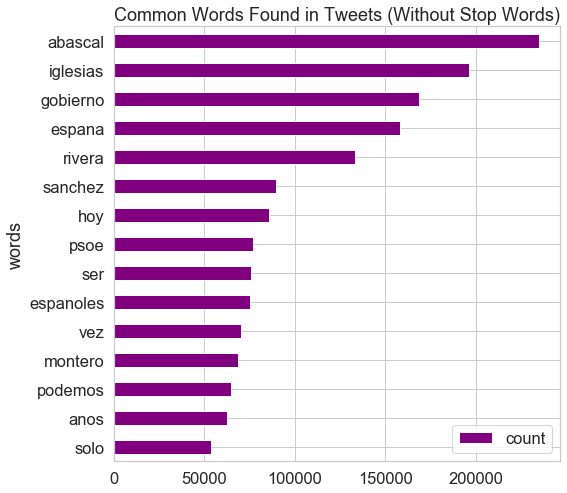

In [33]:
#https://www.analyticsvidhya.com/blog/2018/07/hands-on-sentiment-analysis-dataset-python/
#Grafico mas comunes
clean_tweets_nsw = pd.DataFrame(counts_nsw.most_common(15),
                             columns=['words', 'count'])

fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_tweets_nsw.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in Tweets (Without Stop Words)")

plt.show()

### Filtrar por tweets dirigidos a politicos (dir) y tweets escritos por politicos (col3)

In [34]:
tweets['Dir'].unique()

array(['InesArrimadas', 'Irene_Montero_:', 'InesArrimadas:',
       'sanchezcastejon', 'Irene_Montero_', 'Pablo_Iglesias_:',
       'Albert_Rivera', 'Pablo_Iglesias_', 'Albert_Rivera:',
       '404comunicacion:', 'carmencalvo_:', 'vgomezfrias:',
       'sanchezcastejon:', 'pablocasado_:', 'bcnencomu:', 'ahorapodemos:',
       'desdelamoncloa:', 'M_Presidencia:', 'TeoGarciaEgea:',
       'sanchezcastejon....', 'juanmalpr:', 'carmencalvo_',
       'pablocasado_', 'PSOE:', 'SoniaSierra02:', 'lugaricano:', None,
       'populares:', 'cayetanaAT', 'ONUMedioAmb:', 'sanchezcastejon...',
       'Irene_Montero_.', 'CiudadanoVille:', 'FranHervias:',
       'quintanapaz:', 'manuelmadrid_:', 'CarmenLdeG:',
       'christinalosada:', 'joansabadell:', 'Ruben_Amon:', 'cayetanaAT:',
       'albert_rivera', 'Fort_Apache_:', 'sanchezcastejon,',
       'eucopresident:', 'inesArrimadas', 'Lroldansu:',
       'telepizzaexplot:', 'JaimePalomera:', 'Yolanda_Diaz_',
       'sanchezcastejon.', 'Pablo_Iglesias_

In [35]:
tweets['col3'].unique()

array(['@mikemit87350572', '@DulantziNabar', '@CdpdDavid', ...,
       '@11manu7Manuel', '@mcbpolkas', '@SuliiDguez'], dtype=object)

In [36]:
tweets.Dir.value_counts()

sanchezcastejon              186497
Santi_ABASCAL:               185280
Pablo_Iglesias_:             106881
sanchezcastejon:             101070
Albert_Rivera:               75336 
InesArrimadas                52072 
Pablo_Iglesias_              50744 
pablocasado_:                50322 
Albert_Rivera                48113 
Santi_ABASCAL                39431 
InesArrimadas:               36355 
Irene_Montero_:              31876 
carmencalvo_                 30352 
Irene_Montero_               26758 
pablocasado_                 24800 
cayetanaAT:                  16658 
monasterioR:                 12774 
carmencalvo_:                12257 
cayetanaAT                   10359 
vox_es:                      9849  
monasterioR                  4888  
hermanntertsch:              3676  
PSOE:                        1815  
VOX_Congreso:                1629  
populares:                   1476  
ahorapodemos:                1182  
desdelamoncloa:              1160  
Miquel_R:                   

In [37]:
tweets.col3.value_counts()

@Otravezyo17        1211
@azul77551          825 
@CominsJavier       776 
@pgpnzalo1          700 
@espartano533       595 
@DaroGraa2          528 
@pablocasado_       478 
@el_partal          462 
@AgosMichel         455 
@nachopbruna        434 
@josemariablanc3    431 
@carmencalvo_       417 
@Santi_ABASCAL      390 
@Enedina37049621    370 
@JCFERRERA1         345 
@CiudadanosCs       341 
@Populeiros         338 
@Mamen61280557      332 
@vmezadelc          328 
@joachimyana_ana    327 
@pako_velezmlg      326 
@portparts          324 
@patri_fe           320 
@MVidaller          317 
@Pilar26122520      310 
@Alfrez16           309 
@ppoleiros          307 
@Maria63150183      305 
@1ed06e2568ac4d8    304 
@aneshali           300 
                   ...  
@admiraljvg         1   
@Isaladelatico      1   
@ELSEISDOBLE        1   
@jevg555            1   
@AndreuMonros       1   
@SencillamenteSR    1   
@Esther2mora        1   
@Alfonso28115099    1   
@EdgarLuis94        1   


Filtrar por politico tanto en col3 como en Dir, ver cuantos escribe cada uno y cuantos recibe, ver las palabras más habituales. 
Como al cortar el tweet original a veces quedaba algún signo de puntuación los eliminamos.

In [38]:
tweets=tweets.astype(str)
def  clean_text_2(df):
    df = df.str.lower()
    df = df.apply(lambda elem: " ".join(re.sub("([^0-9A-Za-z \t])", " ", elem).split()))
    return df
tweets['Dir']=clean_text_2(tweets['Dir'])

Filtramos los tweets dirigidos a los ditintos politicos y obtenemos las palabras más frecuentes.

In [39]:
sanchezcastejon = tweets.loc[tweets['Dir'] == "sanchezcastejon"]
santi_abascal = tweets.loc[tweets['Dir'] == "santi abascal"]
pablo_iglesias = tweets.loc[tweets['Dir'] == "pablo iglesias"] 
albert_rivera = tweets.loc[tweets['Dir'] == "albert rivera"]                            
inesarrimadas = tweets.loc[tweets['Dir'] == "inesarrimadas"]                       
pablocasado = tweets.loc[tweets['Dir'] == "pablocasado"]                             
irenemontero = tweets.loc[tweets['Dir'] == "irene montero"]                             
carmencalvo = tweets.loc[tweets['Dir'] == "carmencalvo"]                          
cayetanaat = tweets.loc[tweets['Dir'] == "cayetanaat"]                               
monasterior = tweets.loc[tweets['Dir'] == "monasterior"]

Función que tokeniza y elimina las stop words

In [40]:
def num_palabras(politico):
    tokenized_tweet = politico['tweet'].apply(lambda x: x.split())

    tokenized_tweet=remove_stopwords(tokenized_tweet)

    tweets_nsw = [[word for word in words_in if not word in stop_words_mak]
              for words_in in tokenized_tweet]

    all_words_nsw = list(itertools.chain(*tweets_nsw)) # tokenized_tweet

    counts_nsw = collections.Counter(all_words_nsw)

    count = counts_nsw.most_common(100)

    return count

num_palabras(sanchezcastejon)

[('gobierno', 41439),
 ('espana', 41196),
 ('ser', 23149),
 ('pais', 22848),
 ('iglesias', 19506),
 ('senor', 16312),
 ('rajoy', 15738),
 ('hoy', 14354),
 ('sociedad', 13863),
 ('anos', 13382),
 ('presidente', 12998),
 ('podemos', 12806),
 ('q', 12609),
 ('progresista', 12184),
 ('siempre', 11295),
 ('responsabilidad', 10868),
 ('familia', 10404),
 ('hace', 10286),
 ('vez', 10152),
 ('hacer', 10100),
 ('solo', 9601),
 ('pedro', 9166),
 ('esp', 9125),
 ('personas', 9014),
 ('quiere', 8489),
 ('elecciones', 8419),
 ('ciudadania', 8368),
 ('util', 8337),
 ('gente', 8268),
 ('ahora', 8231),
 ('politica', 8225),
 ('puede', 8199),
 ('enza', 8198),
 ('mujeres', 8086),
 ('despues', 8037),
 ('seguir', 7971),
 ('negociar', 7922),
 ('toda', 7887),
 ('usted', 7840),
 ('primera', 7817),
 ('bien', 7769),
 ('psoe', 7525),
 ('dia', 7482),
 ('libertad', 7473),
 ('up', 7304),
 ('vida', 7276),
 ('mejor', 7149),
 ('construirgobierno', 7090),
 ('sanchez', 7042),
 ('democracia', 7024),
 ('ue', 7009),
 ('izq

In [41]:
num_palabras(santi_abascal)

[('abascal', 226772),
 ('vez', 41907),
 ('espana', 35456),
 ('espanoles', 33037),
 ('mafias', 32168),
 ('vox', 27822),
 ('europa', 26352),
 ('progres', 25468),
 ('inmigracion', 23513),
 ('open', 23201),
 ('arms', 23160),
 ('ilegal', 21881),
 ('llamada', 20231),
 ('ilegales', 19746),
 ('solo', 18203),
 ('politica', 17950),
 ('fronteras', 17925),
 ('progre', 17806),
 ('dictadura', 17724),
 ('efecto', 17164),
 ('ayer', 16936),
 ('trafico', 16764),
 ('congreso', 16738),
 ('asco', 16736),
 ('hoy', 16668),
 ('ongs', 16220),
 ('izquierda', 15804),
 ('atacan', 15473),
 ('ong', 15410),
 ('personas', 14603),
 ('condena', 14432),
 ('terroristas', 13622),
 ('anos', 12423),
 ('chico', 12164),
 ('politicas', 12097),
 ('hace', 12075),
 ('realidad', 11928),
 ('italia', 10927),
 ('manada', 10550),
 ('dinero', 10241),
 ('magrebi', 10241),
 ('defensa', 10216),
 ('xenofobia', 9937),
 ('nunca', 9876),
 ('6', 9733),
 ('sigue', 9721),
 ('sanchez', 9692),
 ('golpe', 9650),
 ('rompen', 9611),
 ('guardias', 957

In [42]:
num_palabras(pablo_iglesias)

[('iglesias', 160247),
 ('gobierno', 57360),
 ('coalicion', 29443),
 ('psoe', 26471),
 ('podemos', 25088),
 ('ser', 23591),
 ('hoy', 21647),
 ('vetos', 21410),
 ('siempre', 19037),
 ('espana', 17451),
 ('poder', 16871),
 ('unidas', 13598),
 ('elecciones', 12863),
 ('izquierdas', 12678),
 ('problema', 12150),
 ('gente', 11553),
 ('sigue', 11483),
 ('votos', 11410),
 ('puede', 11202),
 ('congreso', 10976),
 ('excusa', 10920),
 ('ministros', 10911),
 ('fallecimiento', 10872),
 ('consejo', 10804),
 ('sanchez', 10801),
 ('funciona', 10801),
 ('tiempo', 10742),
 ('proporcional', 10646),
 ('entender', 10629),
 ('presencia', 10605),
 ('debo', 10592),
 ('hace', 10345),
 ('grandes', 10186),
 ('justicia', 9965),
 ('pp', 9732),
 ('responsable', 9606),
 ('medios', 9461),
 ('politica', 9310),
 ('cs', 9303),
 ('cni', 9270),
 ('terroristas', 9262),
 ('ultimo', 9234),
 ('sirve', 9208),
 ('sabia', 9197),
 ('silencio', 9188),
 ('ciertos', 9149),
 ('cambie', 9147),
 ('callan', 9146),
 ('ramblas', 9146),
 

In [43]:
num_palabras(albert_rivera)

[('rivera', 126438),
 ('sanchez', 26314),
 ('espana', 20135),
 ('ciudadanos', 14122),
 ('dia', 12863),
 ('democracia', 11707),
 ('espanoles', 11305),
 ('ley', 11128),
 ('plena', 10488),
 ('hoy', 10426),
 ('gracias', 9914),
 ('torra', 9861),
 ('libertad', 9729),
 ('frente', 9236),
 ('gobierno', 8952),
 ('psoe', 8725),
 ('barcelona', 8069),
 ('apoyo', 7834),
 ('navarra', 7631),
 ('marlaska', 7493),
 ('colau', 7361),
 ('madrid', 7313),
 ('calle', 7126),
 ('merece', 6934),
 ('igualdad', 6853),
 ('politicos', 6597),
 ('separatistas', 6504),
 ('familia', 6305),
 ('debe', 6260),
 ('delincuentes', 6194),
 ('espanola', 6182),
 ('enza', 6008),
 ('gran', 5966),
 ('muchas', 5940),
 ('verg', 5880),
 ('vez', 5852),
 ('siempre', 5666),
 ('enhorabuena', 5657),
 ('ciudad', 5507),
 ('himno', 5468),
 ('impunidad', 5342),
 ('luz', 5269),
 ('vean', 5262),
 ('indefensos', 5254),
 ('actuan', 5253),
 ('victimas', 5008),
 ('anos', 4850),
 ('entrega', 4758),
 ('cs', 4708),
 ('nacionalistas', 4619),
 ('ser', 450

In [44]:
num_palabras(inesarrimadas)

[('espana', 7636),
 ('gobierno', 7209),
 ('cs', 6914),
 ('catalanes', 6869),
 ('sanchez', 6377),
 ('cataluna', 6070),
 ('separatista', 6066),
 ('hoy', 5439),
 ('mientras', 5130),
 ('anos', 4822),
 ('dia', 4023),
 ('solo', 3962),
 ('millones', 3947),
 ('personas', 3672),
 ('ciudadanos', 3604),
 ('govern', 3566),
 ('madrid', 3563),
 ('botin', 3539),
 ('siempre', 3449),
 ('vox', 3413),
 ('orgullo', 3319),
 ('barcelona', 3299),
 ('sociedad', 3289),
 ('partido', 3254),
 ('puede', 3234),
 ('ines', 3192),
 ('pujol', 3181),
 ('roba', 3114),
 ('q', 3112),
 ('dignidad', 3045),
 ('informe', 3039),
 ('ver', 2989),
 ('apoyo', 2988),
 ('hacer', 2977),
 ('dinero', 2958),
 ('ninos', 2888),
 ('enza', 2865),
 ('ens', 2855),
 ('psoe', 2787),
 ('espanya', 2767),
 ('tan', 2765),
 ('mafia', 2751),
 ('verg', 2700),
 ('clan', 2700),
 ('udef', 2694),
 ('crimen', 2685),
 ('organizado', 2681),
 ('290', 2660),
 ('cifra', 2647),
 ('saqueaba', 2638),
 ('clamaban', 2636),
 ('califica', 2636),
 ('fracturaban', 2635),

In [45]:
num_palabras(pablocasado)

[('espana', 16308),
 ('sanchez', 13118),
 ('gobierno', 9461),
 ('apoyo', 8330),
 ('pp', 7826),
 ('psoe', 7382),
 ('presidente', 6067),
 ('libertad', 5545),
 ('espanoles', 4856),
 ('debe', 4810),
 ('hace', 4779),
 ('victimas', 4753),
 ('gran', 4651),
 ('gracias', 4521),
 ('bildu', 4424),
 ('izquierda', 4294),
 ('politica', 4180),
 ('investidura', 4146),
 ('navarra', 4109),
 ('terrorismo', 4077),
 ('empleo', 4072),
 ('eta', 4044),
 ('mejor', 3994),
 ('anos', 3965),
 ('seguridad', 3798),
 ('venezuela', 3756),
 ('servicios', 3743),
 ('personas', 3649),
 ('hoy', 3601),
 ('podemos', 3519),
 ('democracia', 3515),
 ('paro', 3505),
 ('abrazo', 3417),
 ('historia', 3401),
 ('impuestos', 3305),
 ('venezolanos', 3301),
 ('enhorabuena', 3161),
 ('afiliados', 3145),
 ('siempre', 3110),
 ('elecciones', 3084),
 ('iniciativa', 2953),
 ('ser', 2919),
 ('justicia', 2759),
 ('vecinos', 2756),
 ('partido', 2695),
 ('solidaridad', 2657),
 ('cs', 2653),
 ('solo', 2595),
 ('memoria', 2554),
 ('condena', 2554)

In [46]:
num_palabras(irenemontero)

[('montero', 59263),
 ('gobierno', 21374),
 ('podemos', 10601),
 ('psoe', 9273),
 ('coalicion', 8174),
 ('menos', 7969),
 ('precio', 7965),
 ('espana', 7051),
 ('iglesias', 6854),
 ('pablo', 6358),
 ('derechos', 6307),
 ('gobernar', 6195),
 ('queremos', 5471),
 ('sanchez', 5185),
 ('unidas', 5103),
 ('vetos', 4999),
 ('ser', 4971),
 ('regular', 4829),
 ('democracia', 4759),
 ('alquiler', 4665),
 ('presidente', 4515),
 ('debe', 4481),
 ('aun', 4426),
 ('politicas', 4104),
 ('quiere', 4024),
 ('estable', 3968),
 ('decir', 3960),
 ('acuerdo', 3894),
 ('utiles', 3694),
 ('negociar', 3685),
 ('gente', 3640),
 ('partido', 3634),
 ('puede', 3632),
 ('publico', 3628),
 ('anos', 3491),
 ('alquileres', 3439),
 ('hablar', 3255),
 ('vale', 3242),
 ('empleo', 3176),
 ('mujeres', 3170),
 ('hoy', 3147),
 ('cloacas', 3134),
 ('ganar', 3127),
 ('acordar', 3113),
 ('corrupcion', 3105),
 ('pedir', 3104),
 ('respeto', 3063),
 ('debates', 3057),
 ('abstencion', 3028),
 ('perdon', 3013),
 ('electorales', 30

In [47]:
num_palabras(carmencalvo)

[('rne', 5417),
 ('gobierno', 4768),
 ('mujeres', 3918),
 ('anos', 3598),
 ('espana', 3249),
 ('ser', 2929),
 ('podemos', 2619),
 ('q', 2507),
 ('familia', 2350),
 ('unidas', 2281),
 ('mujer', 1949),
 ('psoe', 1911),
 ('usted', 1897),
 ('pais', 1845),
 ('puede', 1792),
 ('hecho', 1676),
 ('hacer', 1648),
 ('carmen', 1643),
 ('democracia', 1626),
 ('enza', 1622),
 ('politica', 1599),
 ('elecciones', 1539),
 ('libertad', 1504),
 ('hace', 1471),
 ('espanoles', 1458),
 ('va', 1449),
 ('ahora', 1446),
 ('verg', 1442),
 ('vida', 1436),
 ('iglesias', 1422),
 ('vez', 1414),
 ('solo', 1398),
 ('machista', 1365),
 ('victimas', 1364),
 ('bastaya', 1343),
 ('ver', 1320),
 ('vamos', 1315),
 ('siempre', 1268),
 ('bonita', 1262),
 ('partido', 1258),
 ('lucha', 1243),
 ('derecha', 1221),
 ('franco', 1201),
 ('1', 1195),
 ('defensa', 1183),
 ('historia', 1165),
 ('senora', 1159),
 ('personas', 1121),
 ('seguir', 1117),
 ('feminismo', 1113),
 ('violencia', 1094),
 ('vidas', 1090),
 ('socialistas', 1080)

In [48]:
num_palabras(cayetanaat)

[('sanchez', 4136),
 ('gracias', 2888),
 ('psoe', 2878),
 ('bildu', 2842),
 ('abstencion', 2584),
 ('navarra', 2330),
 ('partido', 2234),
 ('mismo', 2190),
 ('pp', 2184),
 ('cataluna', 2021),
 ('pnv', 1837),
 ('chivite', 1774),
 ('vamos', 1768),
 ('presidenta', 1728),
 ('0', 1698),
 ('11', 1679),
 ('hoy', 1676),
 ('quiza', 1675),
 ('domingo', 1578),
 ('gobierno', 1556),
 ('espanol', 1535),
 ('via', 1530),
 ('placido', 1526),
 ('aqui', 1463),
 ('m', 1452),
 ('espana', 1432),
 ('espanola', 1385),
 ('ramblas', 1353),
 ('seguro', 1341),
 ('requiem', 1338),
 ('justifica', 1335),
 ('masacres', 1315),
 ('bataclan', 1299),
 ('nueva', 1296),
 ('mediten', 1282),
 ('canten', 1272),
 ('asi', 1271),
 ('mejor', 1195),
 ('redes', 1176),
 ('soprano', 1176),
 ('acuso', 1173),
 ('apoyo', 1172),
 ('mujer', 1143),
 ('menos', 1138),
 ('politica', 1119),
 ('suma', 1116),
 ('millones', 1108),
 ('calvo', 1107),
 ('hombre', 1067),
 ('defensa', 1057),
 ('tener', 1045),
 ('control', 1043),
 ('dos', 1035),
 ('pro

In [49]:
num_palabras(monasterior)

[('vox', 3713),
 ('d', 3707),
 ('licencia', 3638),
 ('hoy', 3586),
 ('espanoles', 3446),
 ('anos', 3103),
 ('q', 2571),
 ('burocracia', 2061),
 ('madrid', 1966),
 ('llevamos', 1662),
 ('padres', 1571),
 ('despacho', 1562),
 ('obra', 1549),
 ('funcionamiento', 1542),
 ('casos', 1540),
 ('2013', 1400),
 ('fin', 1358),
 ('dinero', 1350),
 ('ley', 1332),
 ('sufriendo', 1318),
 ('proceso', 1318),
 ('profesional', 1301),
 ('mujer', 1218),
 ('medios', 1195),
 ('casa', 1183),
 ('psoe', 1174),
 ('explicar', 1174),
 ('voy', 1173),
 ('kafka', 1172),
 ('campana', 1171),
 ('chiringuitos', 1169),
 ('menudo', 1167),
 ('gentuza', 1163),
 ('intoxicacion', 1162),
 ('ciertos', 1160),
 ('tortuoso', 1157),
 ('lograr', 1157),
 ('famosa', 1157),
 ('imaginado', 1157),
 ('padecemos', 1157),
 ('manada', 1153),
 ('magrebies', 1153),
 ('ninguna', 1152),
 ('chica', 1139),
 ('vivido', 1138),
 ('defiende', 1138),
 ('vuelva', 1136),
 ('calles', 1136),
 ('horror', 1135),
 ('asociacion', 1133),
 ('propone', 1133),
 ('v

Filtramos los tweets escritos por los distintos politicos y obtenemos el número de tweets escritos y las palabras más frecuentes.

In [50]:
col_3_sanchezcastejon = tweets.loc[tweets['col3'] == "@sanchezcastejon"]
col_3_santi_abascal = tweets.loc[tweets['col3'] == "@Santi_ABASCAL"]
col_3_pablo_iglesias = tweets.loc[tweets['col3'] == "@Pablo_Iglesias_"] 
col_3_albert_rivera = tweets.loc[tweets['col3'] == "@Albert_Rivera"]                            
col_3_inesarrimadas = tweets.loc[tweets['col3'] == "@InesArrimadas"]                       
col_3_pablocasado = tweets.loc[tweets['col3'] == "@pablocasado_"]                             
col_3_irene_montero = tweets.loc[tweets['col3'] == "@Irene_Montero_"]                             
col_3_carmencalvo = tweets.loc[tweets['col3'] == "@carmencalvo_"]                          
col_3_cayetanaat = tweets.loc[tweets['col3'] == "@cayetanaAT"]                               
col_3_monasterior = tweets.loc[tweets['col3'] == "@monasterioR"]

In [51]:
print(col_3_sanchezcastejon.col3.count())
num_palabras(col_3_sanchezcastejon)

239


[('gobierno', 70),
 ('espana', 56),
 ('hoy', 41),
 ('pais', 34),
 ('construirgobierno', 32),
 ('sociedad', 29),
 ('directo', 27),
 ('progresista', 22),
 ('the', 22),
 ('familia', 21),
 ('social', 20),
 ('presidente', 19),
 ('carino', 17),
 ('anos', 17),
 ('igualdad', 17),
 ('queremos', 16),
 ('debemos', 16),
 ('personas', 16),
 ('to', 16),
 ('ser', 15),
 ('seguir', 15),
 ('europa', 15),
 ('mujeres', 15),
 ('ciudadania', 14),
 ('toda', 14),
 ('organizaciones', 14),
 ('derechos', 13),
 ('necesita', 13),
 ('solidaridad', 13),
 ('cmin', 13),
 ('reunimos', 13),
 ('dia', 12),
 ('enhorabuena', 12),
 ('funciones', 12),
 ('mujer', 12),
 ('programa', 12),
 ('compromiso', 12),
 ('futuro', 12),
 ('politica', 12),
 ('trabajando', 11),
 ('todas', 11),
 ('podemos', 11),
 ('grandes', 11),
 ('i', 11),
 ('medidas', 11),
 ('propuesta', 10),
 ('vida', 10),
 ('juntos', 10),
 ('politicas', 10),
 ('puede', 10),
 ('primera', 10),
 ('paso', 10),
 ('encuentro', 10),
 ('programacomunprogresista', 10),
 ('gran', 

In [52]:
print(col_3_santi_abascal.col3.count())
num_palabras(col_3_santi_abascal)

390


[('abascal', 138),
 ('vox', 125),
 ('congreso', 79),
 ('espanoles', 69),
 ('espana', 62),
 ('inmigracion', 43),
 ('ilegal', 40),
 ('ilegales', 32),
 ('europa', 30),
 ('open', 30),
 ('arms', 30),
 ('solo', 28),
 ('gobierno', 27),
 ('vez', 27),
 ('politica', 27),
 ('inmigrantes', 27),
 ('progres', 26),
 ('espanaviva', 24),
 ('fronteras', 24),
 ('rt', 23),
 ('frente', 22),
 ('efecto', 22),
 ('hilo', 22),
 ('6', 21),
 ('hoy', 21),
 ('politicas', 21),
 ('llamada', 21),
 ('acuerdo', 20),
 ('denuncia', 20),
 ('soberania', 19),
 ('ahora', 19),
 ('ser', 19),
 ('mientras', 19),
 ('openmafia', 19),
 ('mafias', 18),
 ('gran', 17),
 ('dia', 17),
 ('anos', 17),
 ('difunde', 17),
 ('investidura', 16),
 ('sanchez', 16),
 ('barcelona', 16),
 ('diputados', 16),
 ('hace', 16),
 ('manana', 16),
 ('libertad', 16),
 ('ong', 16),
 ('suma', 16),
 ('ustedes', 15),
 ('izquierda', 15),
 ('personas', 15),
 ('nunca', 14),
 ('psoe', 14),
 ('dinero', 14),
 ('realidad', 14),
 ('ayer', 13),
 ('pie', 13),
 ('nadie', 13

In [53]:
print(col_3_pablo_iglesias.col3.count())
num_palabras(col_3_pablo_iglesias)

228


[('podemos', 38),
 ('gobierno', 38),
 ('coalicion', 27),
 ('psoe', 23),
 ('hoy', 21),
 ('iglesias', 18),
 ('unidas', 16),
 ('espana', 16),
 ('aqui', 16),
 ('ser', 13),
 ('derechos', 12),
 ('gracias', 11),
 ('anos', 11),
 ('gente', 11),
 ('programa', 10),
 ('the', 10),
 ('sanchez', 10),
 ('hacer', 10),
 ('siempre', 10),
 ('nunca', 9),
 ('nuevo', 9),
 ('poder', 9),
 ('pedro', 9),
 ('tiempo', 9),
 ('of', 8),
 ('personas', 8),
 ('entrevista', 8),
 ('elecciones', 8),
 ('memoria', 7),
 ('publico', 7),
 ('pais', 7),
 ('ultimo', 7),
 ('puede', 7),
 ('despues', 7),
 ('investidura', 7),
 ('muchas', 7),
 ('sido', 7),
 ('vuelta', 6),
 ('tuerka', 6),
 ('montero', 6),
 ('apache', 6),
 ('seguimos', 6),
 ('igualdad', 6),
 ('ningun', 6),
 ('gran', 6),
 ('partido', 6),
 ('europa', 6),
 ('madrid', 6),
 ('tve', 6),
 ('dia', 6),
 ('horas', 6),
 ('hace', 6),
 ('consulta', 6),
 ('decidir', 6),
 ('politica', 6),
 ('aun', 6),
 ('congreso', 6),
 ('justicia', 6),
 ('calvo', 6),
 ('popular', 6),
 ('escritor', 5),

In [54]:
print(col_3_albert_rivera.col3.count())
num_palabras(col_3_albert_rivera)

218


[('sanchez', 46),
 ('gobierno', 36),
 ('espana', 32),
 ('psoe', 27),
 ('hoy', 26),
 ('gran', 26),
 ('ciudadanos', 23),
 ('enhorabuena', 23),
 ('madrid', 22),
 ('espanoles', 21),
 ('dia', 21),
 ('gracias', 20),
 ('muchas', 18),
 ('democracia', 18),
 ('navarra', 17),
 ('cs', 17),
 ('equipo', 16),
 ('comunidad', 16),
 ('apoyo', 15),
 ('libertad', 14),
 ('vamos', 13),
 ('separatistas', 13),
 ('familias', 12),
 ('debe', 12),
 ('mundo', 12),
 ('igualdad', 11),
 ('ley', 11),
 ('familia', 11),
 ('vez', 11),
 ('odio', 10),
 ('toda', 10),
 ('anos', 10),
 ('nuevo', 10),
 ('victimas', 10),
 ('entrega', 10),
 ('orgullo', 10),
 ('espanola', 10),
 ('ser', 10),
 ('vida', 10),
 ('partido', 9),
 ('politicos', 9),
 ('otegi', 9),
 ('entrevista', 9),
 ('solo', 9),
 ('felicidades', 9),
 ('impuestos', 9),
 ('tan', 9),
 ('todas', 9),
 ('defender', 8),
 ('quiero', 8),
 ('politica', 8),
 ('madrilenos', 8),
 ('vecinos', 8),
 ('nadie', 8),
 ('agentes', 8),
 ('hace', 8),
 ('verg', 8),
 ('enza', 8),
 ('cambio', 8),

In [55]:
print(col_3_inesarrimadas.col3.count())
num_palabras(col_3_inesarrimadas)

246


[('cs', 33),
 ('gobierno', 26),
 ('sanchez', 23),
 ('hoy', 23),
 ('espana', 23),
 ('catalanes', 22),
 ('cataluna', 22),
 ('govern', 17),
 ('ciudadanos', 16),
 ('rivera', 16),
 ('torra', 14),
 ('libertad', 13),
 ('dia', 13),
 ('siempre', 13),
 ('madrid', 13),
 ('solo', 13),
 ('anos', 13),
 ('gran', 13),
 ('barcelona', 12),
 ('pais', 12),
 ('separatista', 12),
 ('enhorabuena', 11),
 ('derechos', 11),
 ('orgullo', 11),
 ('seguridad', 11),
 ('mientras', 11),
 ('hacer', 11),
 ('espanoles', 11),
 ('vez', 10),
 ('familias', 10),
 ('ser', 10),
 ('debe', 10),
 ('personas', 10),
 ('puede', 10),
 ('colau', 10),
 ('inseguridad', 10),
 ('ley', 9),
 ('mundo', 9),
 ('trabajando', 9),
 ('apoyo', 9),
 ('aqui', 9),
 ('hace', 9),
 ('dinero', 9),
 ('proyecto', 9),
 ('the', 9),
 ('mejor', 8),
 ('proces', 8),
 ('inaccion', 8),
 ('seguir', 8),
 ('medidas', 8),
 ('meses', 8),
 ('of', 8),
 ('defender', 7),
 ('violencia', 7),
 ('partido', 7),
 ('psoe', 7),
 ('marlaska', 7),
 ('historia', 7),
 ('muchas', 7),
 ('

In [56]:
print(col_3_pablocasado.col3.count())
num_palabras(col_3_pablocasado)

478


[('espana', 113),
 ('sanchez', 108),
 ('gobierno', 74),
 ('presidente', 69),
 ('ano', 56),
 ('hoy', 56),
 ('gracias', 48),
 ('pp', 44),
 ('hace', 39),
 ('politica', 37),
 ('espanoles', 35),
 ('apoyo', 34),
 ('psoe', 33),
 ('libertad', 31),
 ('gran', 31),
 ('navarra', 29),
 ('siempre', 28),
 ('partido', 27),
 ('mejor', 25),
 ('anos', 25),
 ('proyecto', 25),
 ('trabajo', 25),
 ('1anodeilusion', 25),
 ('victimas', 24),
 ('historia', 22),
 ('frente', 22),
 ('investidura', 21),
 ('bildu', 21),
 ('enhorabuena', 21),
 ('ser', 21),
 ('vamos', 21),
 ('debe', 20),
 ('futuro', 20),
 ('dia', 20),
 ('servicios', 20),
 ('empleo', 19),
 ('trabajando', 19),
 ('pedro', 19),
 ('eta', 19),
 ('personas', 18),
 ('ley', 18),
 ('impuestos', 17),
 ('podemos', 17),
 ('terrorismo', 17),
 ('nacional', 17),
 ('seguimos', 17),
 ('tras', 17),
 ('millones', 16),
 ('moreno', 16),
 ('solo', 16),
 ('madrid', 16),
 ('fiscal', 16),
 ('seguir', 15),
 ('cambio', 15),
 ('elegido', 15),
 ('meses', 15),
 ('abrazo', 15),
 ('nu

In [57]:
print(col_3_irene_montero.col3.count())
num_palabras(col_3_irene_montero)

121


[('gobierno', 51),
 ('psoe', 27),
 ('coalicion', 23),
 ('iglesias', 22),
 ('podemos', 20),
 ('espana', 14),
 ('sanchez', 13),
 ('derechos', 12),
 ('hoy', 11),
 ('negociar', 10),
 ('elecciones', 10),
 ('unidas', 10),
 ('investidura', 10),
 ('ser', 9),
 ('gente', 9),
 ('solo', 9),
 ('alquileres', 8),
 ('vetos', 8),
 ('europa', 8),
 ('puede', 8),
 ('personas', 8),
 ('anos', 8),
 ('hilo', 7),
 ('queremos', 7),
 ('precio', 7),
 ('congreso', 7),
 ('pedro', 7),
 ('mujeres', 6),
 ('dia', 6),
 ('cloacas', 6),
 ('acuerdo', 6),
 ('ahora', 6),
 ('quiere', 6),
 ('pp', 6),
 ('publico', 6),
 ('cada', 6),
 ('orgullo', 5),
 ('julio', 5),
 ('estable', 5),
 ('atras', 5),
 ('abro', 5),
 ('debe', 5),
 ('votar', 5),
 ('consulta', 5),
 ('fuerza', 5),
 ('siempre', 5),
 ('cosas', 5),
 ('hacer', 5),
 ('necesita', 5),
 ('social', 5),
 ('sido', 5),
 ('pais', 5),
 ('todas', 4),
 ('falta', 4),
 ('mientras', 4),
 ('vivienda', 4),
 ('servicios', 4),
 ('nuevo', 4),
 ('montero', 4),
 ('negociacion', 4),
 ('acuerdos', 4

In [58]:
print(col_3_carmencalvo.col3.count())
num_palabras(col_3_carmencalvo)

417


[('gobierno', 157),
 ('presidencia', 84),
 ('programacomunprogresista', 80),
 ('espana', 71),
 ('mujeres', 49),
 ('funciones', 44),
 ('vicepresidenta', 42),
 ('pais', 38),
 ('siapedro', 38),
 ('europa', 32),
 ('igualdad', 32),
 ('politica', 31),
 ('puede', 30),
 ('ser', 28),
 ('vida', 28),
 ('anos', 27),
 ('democracia', 27),
 ('queremos', 27),
 ('derechos', 26),
 ('politicas', 25),
 ('hoy', 25),
 ('elecciones', 24),
 ('psoe', 24),
 ('programa', 23),
 ('sociedad', 22),
 ('presidente', 21),
 ('iglesias', 21),
 ('partir', 21),
 ('lucha', 20),
 ('podemos', 19),
 ('siempre', 19),
 ('hacer', 19),
 ('progresista', 19),
 ('personas', 19),
 ('hace', 18),
 ('ahora', 18),
 ('ley', 18),
 ('up', 18),
 ('1', 17),
 ('violenciadegenero', 17),
 ('va', 17),
 ('unidas', 17),
 ('investidura', 16),
 ('libertad', 16),
 ('social', 15),
 ('responsabilidad', 15),
 ('seguir', 15),
 ('hecho', 15),
 ('manera', 15),
 ('mujer', 15),
 ('tener', 15),
 ('gobiernoejemplar', 15),
 ('partido', 14),
 ('todas', 14),
 ('vic

In [59]:
print(col_3_cayetanaat.col3.count())
num_palabras(col_3_cayetanaat)

155


[('sanchez', 32),
 ('hoy', 18),
 ('espana', 17),
 ('gobierno', 17),
 ('navarra', 15),
 ('cataluna', 15),
 ('toledo', 13),
 ('pp', 13),
 ('psoe', 13),
 ('alvarez', 12),
 ('suma', 12),
 ('politica', 12),
 ('libertad', 11),
 ('congreso', 10),
 ('izquierda', 9),
 ('solo', 9),
 ('bildu', 9),
 ('defensa', 9),
 ('espanol', 8),
 ('gracias', 8),
 ('tras', 8),
 ('anos', 7),
 ('comun', 7),
 ('diputados', 7),
 ('hace', 6),
 ('blanco', 6),
 ('calvo', 6),
 ('entrevista', 6),
 ('pedro', 6),
 ('barcelona', 6),
 ('elecciones', 6),
 ('apoyo', 6),
 ('democracia', 6),
 ('aqui', 6),
 ('espanoles', 6),
 ('vamos', 6),
 ('valores', 5),
 ('mejor', 5),
 ('espanola', 5),
 ('gran', 5),
 ('victimas', 5),
 ('edicion', 5),
 ('curso', 5),
 ('frente', 5),
 ('primera', 5),
 ('verdad', 5),
 ('alta', 5),
 ('anuncia', 5),
 ('mismo', 5),
 ('investidura', 5),
 ('manana', 5),
 ('ver', 5),
 ('va', 5),
 ('personas', 5),
 ('via', 5),
 ('debate', 5),
 ('libro', 5),
 ('dos', 5),
 ('pleno', 5),
 ('lanoche24h', 5),
 ('menos', 4),
 

In [60]:
print(col_3_monasterior.col3.count())
num_palabras(col_3_monasterior)

120


[('vox', 50),
 ('abascal', 21),
 ('licencia', 19),
 ('hoy', 14),
 ('anos', 14),
 ('madrid', 14),
 ('espanoles', 13),
 ('espana', 12),
 ('obra', 12),
 ('izquierda', 10),
 ('libertad', 9),
 ('mientras', 9),
 ('casa', 9),
 ('congreso', 9),
 ('inmigracion', 9),
 ('ilegal', 8),
 ('solo', 7),
 ('fin', 7),
 ('espanaviva', 7),
 ('dos', 7),
 ('nueva', 7),
 ('ayuntamiento', 7),
 ('pp', 6),
 ('ideas', 6),
 ('ser', 6),
 ('asi', 6),
 ('constructor', 6),
 ('cs', 5),
 ('investidura', 5),
 ('nuevo', 5),
 ('discurso', 5),
 ('progre', 5),
 ('padres', 5),
 ('manana', 5),
 ('progres', 5),
 ('vez', 5),
 ('denuncia', 5),
 ('politicas', 5),
 ('d', 5),
 ('psoe', 5),
 ('podemos', 5),
 ('pagamos', 5),
 ('primera', 5),
 ('ocupacion', 5),
 ('violencia', 5),
 ('noche', 4),
 ('toma', 4),
 ('nacional', 4),
 ('pais', 4),
 ('rt', 4),
 ('efecto', 4),
 ('familia', 4),
 ('hace', 4),
 ('ley', 4),
 ('ahora', 4),
 ('diputados', 4),
 ('asamblea', 4),
 ('llevamos', 4),
 ('entrevista', 4),
 ('siempre', 4),
 ('ayuso', 4),
 ('to

Filtrar los que son RT, obtener palabras más frecuentes tanto  RT en general, como por dirigido a politico y escrito por poltico. 

In [105]:
RT = tweets.loc[tweets['RT'] == '1']

In [85]:
num_palabras(RT)

[('abascal', 191734),
 ('gobierno', 142159),
 ('espana', 130498),
 ('iglesias', 128591),
 ('hoy', 79807),
 ('rivera', 76389),
 ('sanchez', 75768),
 ('espanoles', 63274),
 ('psoe', 60255),
 ('vez', 56945),
 ('ser', 54492),
 ('anos', 52680),
 ('podemos', 51537),
 ('politica', 41782),
 ('siempre', 41492),
 ('vox', 40568),
 ('hace', 39834),
 ('coalicion', 39358),
 ('europa', 38978),
 ('congreso', 37712),
 ('libertad', 37318),
 ('montero', 36630),
 ('dia', 36539),
 ('personas', 34008),
 ('solo', 33940),
 ('mafias', 33168),
 ('democracia', 32567),
 ('apoyo', 31169),
 ('sigue', 28645),
 ('debe', 28623),
 ('gran', 28537),
 ('inmigracion', 27867),
 ('frente', 27491),
 ('open', 27396),
 ('arms', 27396),
 ('gracias', 27394),
 ('izquierda', 26795),
 ('unidas', 26524),
 ('vetos', 26490),
 ('nunca', 25878),
 ('progres', 25741),
 ('cs', 25130),
 ('politicas', 25013),
 ('ilegal', 24982),
 ('terroristas', 24737),
 ('grandes', 24701),
 ('puede', 24084),
 ('familia', 24049),
 ('poder', 23536),
 ('medios'

Filtramos aquellos tweets que son RT DIRIGIDOS a politicos y obtenemos la frecuencia de palabras.

In [86]:
RT_sanchezcastejon = RT.loc[RT['Dir'] == "sanchezcastejon"]
RT_santi_abascal = RT.loc[RT['Dir'] == "santi abascal"]
RT_pablo_iglesias = RT.loc[RT['Dir'] == "pablo iglesias"] 
RT_albert_rivera = RT.loc[RT['Dir'] == "albert rivera"]                            
RT_inesarrimadas = RT.loc[RT['Dir'] == "inesarrimadas"]                       
RT_pablocasado = RT.loc[RT['Dir'] == "pablocasado"]                             
RT_irenemontero = RT.loc[RT['Dir'] == "irene montero"]                             
RT_carmencalvo = RT.loc[RT['Dir'] == "carmencalvo"]                          
RT_cayetanaat = RT.loc[RT['Dir'] == "cayetanaat"]                               
RT_monasterior = RT.loc[RT['Dir'] == "monasterior"]

In [87]:
num_palabras(RT_sanchezcastejon)

[('espana', 28942),
 ('gobierno', 27351),
 ('ser', 14730),
 ('rajoy', 14522),
 ('senor', 13530),
 ('pais', 13069),
 ('sociedad', 12586),
 ('hoy', 11914),
 ('responsabilidad', 10099),
 ('progresista', 9878),
 ('anos', 9637),
 ('familia', 9589),
 ('siempre', 7927),
 ('iglesias', 7756),
 ('util', 7327),
 ('primera', 7245),
 ('ciudadania', 7148),
 ('construirgobierno', 6932),
 ('libertad', 6647),
 ('ue', 6620),
 ('mujeres', 6619),
 ('seguir', 6559),
 ('fuerza', 6550),
 ('emergencias', 6483),
 ('debemos', 6469),
 ('negociar', 6429),
 ('enhorabuena', 6321),
 ('openarms', 6258),
 ('personas', 6199),
 ('progreso', 6191),
 ('recibir', 6151),
 ('toda', 6093),
 ('hace', 6063),
 ('podemos', 5990),
 ('necesario', 5947),
 ('carino', 5928),
 ('the', 5906),
 ('necesita', 5808),
 ('puerto', 5746),
 ('solidaria', 5681),
 ('solidaridad', 5625),
 ('politica', 5611),
 ('espanola', 5560),
 ('democracia', 5558),
 ('trabajando', 5512),
 ('quiere', 5490),
 ('paso', 5483),
 ('social', 5421),
 ('reto', 5406),
 (

In [88]:
num_palabras(RT_santi_abascal)

[('abascal', 185266),
 ('vez', 41084),
 ('mafias', 31717),
 ('espana', 31550),
 ('espanoles', 31208),
 ('europa', 25750),
 ('vox', 25201),
 ('progres', 25056),
 ('inmigracion', 23064),
 ('open', 22756),
 ('arms', 22756),
 ('ilegal', 21536),
 ('llamada', 20058),
 ('ilegales', 19412),
 ('fronteras', 17732),
 ('progre', 17590),
 ('dictadura', 17580),
 ('politica', 17371),
 ('efecto', 16993),
 ('ayer', 16842),
 ('solo', 16660),
 ('trafico', 16606),
 ('hoy', 16236),
 ('asco', 16153),
 ('ongs', 16083),
 ('congreso', 15653),
 ('atacan', 15388),
 ('ong', 15098),
 ('izquierda', 14824),
 ('condena', 14346),
 ('personas', 13862),
 ('terroristas', 13377),
 ('chico', 12128),
 ('politicas', 11936),
 ('anos', 11749),
 ('realidad', 11713),
 ('hace', 11302),
 ('italia', 10720),
 ('magrebi', 10195),
 ('manada', 10191),
 ('defensa', 10114),
 ('xenofobia', 9820),
 ('6', 9659),
 ('rompen', 9608),
 ('dinero', 9568),
 ('golpe', 9559),
 ('sigue', 9489),
 ('guardias', 9483),
 ('nunca', 9442),
 ('soberania', 93

In [89]:
num_palabras(RT_pablo_iglesias)

[('iglesias', 106881),
 ('gobierno', 52503),
 ('coalicion', 28138),
 ('psoe', 23153),
 ('podemos', 22244),
 ('vetos', 21299),
 ('ser', 21132),
 ('hoy', 20752),
 ('siempre', 17710),
 ('poder', 15827),
 ('espana', 15287),
 ('unidas', 13139),
 ('izquierdas', 11690),
 ('problema', 11679),
 ('sigue', 11059),
 ('fallecimiento', 10801),
 ('congreso', 10740),
 ('funciona', 10707),
 ('consejo', 10577),
 ('ministros', 10577),
 ('debo', 10576),
 ('excusa', 10576),
 ('presencia', 10576),
 ('proporcional', 10576),
 ('votos', 10576),
 ('entender', 10478),
 ('tiempo', 10017),
 ('grandes', 10011),
 ('gente', 9707),
 ('elecciones', 9673),
 ('justicia', 9444),
 ('puede', 9440),
 ('responsable', 9316),
 ('pp', 9148),
 ('medios', 9123),
 ('cs', 9117),
 ('sirve', 9116),
 ('ciertos', 9116),
 ('silencio', 9115),
 ('cni', 9115),
 ('sabia', 9115),
 ('terroristas', 9115),
 ('ramblas', 9115),
 ('revela', 9115),
 ('cambie', 9115),
 ('impidieron', 9115),
 ('investigara', 9115),
 ('callan', 9115),
 ('ultimo', 9089)

In [90]:
num_palabras(RT_albert_rivera)

[('rivera', 75318),
 ('sanchez', 25048),
 ('espana', 17039),
 ('ciudadanos', 12647),
 ('dia', 11734),
 ('democracia', 11281),
 ('ley', 10736),
 ('plena', 10470),
 ('espanoles', 10267),
 ('hoy', 9952),
 ('torra', 9670),
 ('libertad', 9252),
 ('gracias', 9217),
 ('frente', 9121),
 ('psoe', 7743),
 ('gobierno', 7646),
 ('barcelona', 7571),
 ('apoyo', 7480),
 ('navarra', 7384),
 ('marlaska', 7242),
 ('colau', 7101),
 ('calle', 6918),
 ('igualdad', 6616),
 ('separatistas', 6375),
 ('merece', 6304),
 ('familia', 6138),
 ('delincuentes', 5995),
 ('debe', 5957),
 ('espanola', 5952),
 ('muchas', 5746),
 ('politicos', 5640),
 ('gran', 5512),
 ('enhorabuena', 5490),
 ('ciudad', 5302),
 ('impunidad', 5295),
 ('vean', 5239),
 ('actuan', 5235),
 ('indefensos', 5235),
 ('luz', 5235),
 ('himno', 4924),
 ('siempre', 4755),
 ('victimas', 4725),
 ('entrega', 4711),
 ('verg', 4682),
 ('enza', 4682),
 ('vez', 4682),
 ('nacionalistas', 4473),
 ('civiles', 4314),
 ('guardias', 4312),
 ('anos', 4122),
 ('gran

In [91]:
num_palabras(RT_inesarrimadas)

[('gobierno', 6321),
 ('catalanes', 6215),
 ('espana', 5979),
 ('separatista', 5888),
 ('cs', 5881),
 ('sanchez', 5867),
 ('hoy', 5024),
 ('cataluna', 4845),
 ('mientras', 4789),
 ('anos', 4074),
 ('millones', 3661),
 ('govern', 3488),
 ('botin', 3486),
 ('personas', 3207),
 ('sociedad', 3107),
 ('roba', 2967),
 ('barcelona', 2830),
 ('informe', 2811),
 ('dia', 2753),
 ('dignidad', 2752),
 ('apoyo', 2656),
 ('ninos', 2639),
 ('pujol', 2636),
 ('clamaban', 2634),
 ('espanya', 2634),
 ('ens', 2634),
 ('fracturaban', 2634),
 ('mafia', 2634),
 ('saqueaba', 2634),
 ('udef', 2634),
 ('cifra', 2634),
 ('clan', 2634),
 ('290', 2634),
 ('califica', 2634),
 ('crimen', 2634),
 ('organizado', 2634),
 ('dinero', 2591),
 ('siempre', 2406),
 ('sanchista', 2355),
 ('ciudadanos', 2320),
 ('puede', 2308),
 ('enhorabuena', 2283),
 ('nacionalistas', 2265),
 ('constitucionalistas', 2213),
 ('psoe', 2101),
 ('cumplen', 2062),
 ('gran', 2058),
 ('inseguridad', 2041),
 ('torra', 2026),
 ('orgullo', 2013),
 ('

In [92]:
num_palabras(RT_pablocasado)

[('espana', 14632),
 ('sanchez', 12399),
 ('gobierno', 8733),
 ('apoyo', 8107),
 ('psoe', 6736),
 ('pp', 5847),
 ('presidente', 5527),
 ('libertad', 5394),
 ('debe', 4658),
 ('gran', 4328),
 ('victimas', 4312),
 ('espanoles', 4201),
 ('hace', 4176),
 ('bildu', 4079),
 ('izquierda', 4025),
 ('gracias', 4000),
 ('investidura', 3989),
 ('navarra', 3986),
 ('empleo', 3964),
 ('terrorismo', 3808),
 ('seguridad', 3729),
 ('politica', 3681),
 ('servicios', 3669),
 ('eta', 3537),
 ('venezuela', 3529),
 ('personas', 3419),
 ('abrazo', 3384),
 ('anos', 3369),
 ('mejor', 3366),
 ('hoy', 3365),
 ('paro', 3362),
 ('democracia', 3319),
 ('venezolanos', 3268),
 ('podemos', 3267),
 ('historia', 3216),
 ('afiliados', 3125),
 ('impuestos', 3108),
 ('enhorabuena', 3044),
 ('iniciativa', 2936),
 ('vecinos', 2719),
 ('elecciones', 2631),
 ('solidaridad', 2599),
 ('siempre', 2548),
 ('condena', 2514),
 ('cs', 2499),
 ('justicia', 2482),
 ('heroes', 2436),
 ('demagogia', 2431),
 ('mes', 2422),
 ('memoria', 2

In [93]:
num_palabras(RT_irenemontero)

[('montero', 31873),
 ('gobierno', 19342),
 ('podemos', 9171),
 ('psoe', 7956),
 ('coalicion', 7681),
 ('precio', 7626),
 ('menos', 7276),
 ('espana', 6037),
 ('derechos', 5921),
 ('iglesias', 5740),
 ('pablo', 5723),
 ('gobernar', 5723),
 ('queremos', 5153),
 ('vetos', 4971),
 ('unidas', 4835),
 ('regular', 4755),
 ('alquiler', 4397),
 ('sanchez', 4302),
 ('presidente', 4291),
 ('debe', 4271),
 ('democracia', 4269),
 ('aun', 4213),
 ('estable', 3919),
 ('politicas', 3844),
 ('ser', 3561),
 ('utiles', 3554),
 ('negociar', 3536),
 ('acuerdo', 3478),
 ('decir', 3402),
 ('quiere', 3323),
 ('publico', 3314),
 ('alquileres', 3265),
 ('acordar', 3095),
 ('empleo', 3077),
 ('vale', 3004),
 ('corrupcion', 2960),
 ('anos', 2959),
 ('juez', 2956),
 ('hablar', 2953),
 ('partido', 2949),
 ('cifuentes', 2949),
 ('ganar', 2948),
 ('imputa', 2947),
 ('aguirre', 2947),
 ('insiste', 2947),
 ('pedir', 2947),
 ('abstencion', 2947),
 ('debates', 2947),
 ('electorales', 2947),
 ('perdon', 2947),
 ('hoy', 2

In [94]:
num_palabras(RT_carmencalvo)

[('gobierno', 2887),
 ('mujeres', 2799),
 ('anos', 2350),
 ('familia', 2165),
 ('unidas', 2088),
 ('espana', 2061),
 ('podemos', 1693),
 ('democracia', 1346),
 ('bastaya', 1329),
 ('hecho', 1248),
 ('mujer', 1245),
 ('libertad', 1232),
 ('machista', 1165),
 ('lucha', 1136),
 ('defensa', 1117),
 ('ser', 1080),
 ('pais', 1075),
 ('politica', 1049),
 ('carino', 1046),
 ('victimas', 1041),
 ('vida', 1025),
 ('rne', 1023),
 ('vamos', 996),
 ('vidas', 973),
 ('1', 965),
 ('programacomunprogresista', 924),
 ('puede', 917),
 ('asesinada', 895),
 ('seguir', 888),
 ('sociedad', 887),
 ('investidura', 875),
 ('iglesias', 841),
 ('lacra', 840),
 ('blanca', 836),
 ('objetivocarmencalvo', 829),
 ('progresista', 802),
 ('historia', 796),
 ('va', 792),
 ('posicion', 775),
 ('paso', 766),
 ('siempre', 760),
 ('respeto', 753),
 ('manera', 739),
 ('medios', 725),
 ('elecciones', 723),
 ('hacer', 719),
 ('personas', 706),
 ('libertades', 700),
 ('80', 698),
 ('despues', 698),
 ('olvidamos', 698),
 ('13ros

In [95]:
num_palabras(RT_cayetanaat)

[('sanchez', 4002),
 ('gracias', 2692),
 ('psoe', 2686),
 ('bildu', 2587),
 ('abstencion', 2534),
 ('navarra', 2246),
 ('mismo', 1985),
 ('cataluna', 1814),
 ('chivite', 1760),
 ('pnv', 1744),
 ('presidenta', 1696),
 ('quiza', 1657),
 ('vamos', 1651),
 ('0', 1620),
 ('hoy', 1581),
 ('11', 1567),
 ('domingo', 1564),
 ('partido', 1540),
 ('placido', 1508),
 ('via', 1499),
 ('espanol', 1441),
 ('gobierno', 1400),
 ('aqui', 1345),
 ('pp', 1329),
 ('m', 1315),
 ('espanola', 1296),
 ('justifica', 1267),
 ('masacres', 1267),
 ('ramblas', 1267),
 ('bataclan', 1267),
 ('seguro', 1267),
 ('mediten', 1267),
 ('canten', 1267),
 ('requiem', 1267),
 ('nueva', 1267),
 ('soprano', 1169),
 ('acuso', 1169),
 ('redes', 1169),
 ('apoyo', 1133),
 ('suma', 1080),
 ('calvo', 1080),
 ('millones', 1063),
 ('espana', 1051),
 ('defensa', 1037),
 ('control', 1034),
 ('hombre', 1010),
 ('convicciones', 1010),
 ('sesiondeinvestidura', 1010),
 ('felix', 989),
 ('ovejero', 989),
 ('mejor', 989),
 ('asi', 982),
 ('muj

In [96]:
num_palabras(RT_monasterior)

[('d', 3602),
 ('hoy', 3534),
 ('licencia', 3480),
 ('vox', 3348),
 ('espanoles', 3287),
 ('anos', 3002),
 ('q', 2257),
 ('burocracia', 1929),
 ('madrid', 1800),
 ('llevamos', 1657),
 ('despacho', 1539),
 ('funcionamiento', 1537),
 ('padres', 1530),
 ('casos', 1526),
 ('obra', 1470),
 ('2013', 1397),
 ('sufriendo', 1312),
 ('fin', 1310),
 ('proceso', 1308),
 ('profesional', 1288),
 ('dinero', 1281),
 ('ley', 1221),
 ('medios', 1156),
 ('campana', 1155),
 ('intoxicacion', 1155),
 ('ciertos', 1155),
 ('voy', 1155),
 ('explicar', 1155),
 ('tortuoso', 1155),
 ('lograr', 1155),
 ('famosa', 1155),
 ('kafka', 1155),
 ('imaginado', 1155),
 ('menudo', 1155),
 ('padecemos', 1155),
 ('chiringuitos', 1132),
 ('mujer', 1131),
 ('ninguna', 1128),
 ('asociacion', 1128),
 ('denunciara', 1128),
 ('horror', 1128),
 ('vivido', 1128),
 ('chica', 1128),
 ('violada', 1128),
 ('manada', 1128),
 ('magrebies', 1128),
 ('bilbao', 1128),
 ('servir', 1128),
 ('psoe', 1128),
 ('propone', 1128),
 ('gentuza', 1128),

Filtramos aquellos tweets que son RT ESCRITOS por politicos y obtenemos la frecuencia de palabras.

In [121]:
RT_col_3_sanchezcastejon = RT.loc[RT['col3'] == "@sanchezcastejon"]
RT_col_3_santi_abascal = RT.loc[RT['col3'] == "@Santi_ABASCAL"]
RT_col_3_pablo_iglesias = RT.loc[RT['col3'] == "@Pablo_Iglesias_"] 
RT_col_3_albert_rivera = RT.loc[RT['col3'] == "@Albert_Rivera"]                            
RT_col_3_inesarrimadas = RT.loc[RT['col3'] == "@InesArrimadas"]                       
RT_col_3_pablocasado = RT.loc[RT['col3'] == "@pablocasado_"]                             
RT_col_3_irene_montero = RT.loc[RT['col3'] == "@Irene_Montero_"]                             
RT_col_3_carmencalvo = RT.loc[RT['col3'] == "@carmencalvo_"]                          
RT_col_3_cayetanaat = RT.loc[RT['col3'] == "@cayetanaAT"]                               
RT_col_3_monasterior = RT.loc[RT['col3'] == "@monasterioR"]

In [108]:
num_palabras(RT_col_3_sanchezcastejon)

[('gobierno', 31),
 ('directo', 21),
 ('presidente', 17),
 ('funciones', 12),
 ('rueda', 9),
 ('prensa', 9),
 ('cmin', 9),
 ('hoy', 9),
 ('pais', 8),
 ('construirgobierno', 8),
 ('espana', 7),
 ('posterior', 6),
 ('to', 6),
 ('comparecencia', 6),
 ('ministra', 6),
 ('tras', 5),
 ('general', 5),
 ('medidas', 5),
 ('personas', 4),
 ('sociedad', 4),
 ('politicas', 4),
 ('psoe', 4),
 ('00', 4),
 ('the', 4),
 ('progresista', 4),
 ('compromiso', 4),
 ('propuestas', 4),
 ('puede', 4),
 ('futuro', 4),
 ('ferraz', 3),
 ('espanaavanza', 3),
 ('000', 3),
 ('paso', 3),
 ('informacion', 3),
 ('alquiler', 3),
 ('ciudadania', 3),
 ('toda', 3),
 ('comision', 3),
 ('secretario', 3),
 ('partir', 3),
 ('anos', 3),
 ('dia', 3),
 ('portavoz', 3),
 ('socialista', 3),
 ('junto', 3),
 ('palacio', 3),
 ('informar', 3),
 ('programa', 3),
 ('ano', 3),
 ('objetivo', 3),
 ('politica', 3),
 ('colectivos', 3),
 ('sigue', 3),
 ('pleno', 3),
 ('queremos', 3),
 ('300', 3),
 ('primer', 3),
 ('ministro', 2),
 ('derechos'

In [109]:
num_palabras(RT_col_3_santi_abascal)

[('abascal', 138),
 ('vox', 114),
 ('congreso', 74),
 ('espanoles', 56),
 ('espana', 48),
 ('ilegal', 33),
 ('inmigracion', 33),
 ('ilegales', 26),
 ('inmigrantes', 26),
 ('open', 25),
 ('arms', 25),
 ('politica', 24),
 ('gobierno', 23),
 ('rt', 23),
 ('europa', 23),
 ('hilo', 22),
 ('solo', 21),
 ('espanaviva', 20),
 ('frente', 19),
 ('acuerdo', 19),
 ('vez', 19),
 ('denuncia', 19),
 ('ser', 18),
 ('openmafia', 18),
 ('6', 17),
 ('efecto', 17),
 ('difunde', 17),
 ('progres', 17),
 ('soberania', 16),
 ('hoy', 16),
 ('mientras', 16),
 ('diputados', 15),
 ('ustedes', 15),
 ('fronteras', 15),
 ('politicas', 15),
 ('llamada', 15),
 ('ahora', 14),
 ('barcelona', 14),
 ('investidura', 14),
 ('anos', 14),
 ('dia', 14),
 ('libertad', 14),
 ('suma', 14),
 ('gran', 13),
 ('manana', 13),
 ('psoe', 13),
 ('ong', 13),
 ('hace', 12),
 ('pie', 12),
 ('sanitaria', 12),
 ('seguridad', 11),
 ('sociedad', 11),
 ('sanchez', 11),
 ('directo', 11),
 ('izquierda', 11),
 ('espanol', 11),
 ('pagan', 11),
 ('fr

In [110]:
num_palabras(RT_col_3_pablo_iglesias)

[('podemos', 20),
 ('iglesias', 18),
 ('psoe', 18),
 ('gobierno', 17),
 ('coalicion', 15),
 ('aqui', 13),
 ('unidas', 10),
 ('espana', 8),
 ('sanchez', 8),
 ('ser', 8),
 ('nunca', 7),
 ('pedro', 6),
 ('hoy', 6),
 ('entrevista', 6),
 ('calvo', 6),
 ('programa', 5),
 ('directo', 5),
 ('madrid', 5),
 ('mayoria', 5),
 ('ovt', 5),
 ('publico', 5),
 ('pais', 5),
 ('carmen', 5),
 ('nuevo', 4),
 ('pierdas', 4),
 ('verdad', 4),
 ('tve', 4),
 ('pablo', 4),
 ('hacer', 4),
 ('consulta', 4),
 ('decidir', 4),
 ('gente', 4),
 ('ningun', 4),
 ('horas', 4),
 ('open', 4),
 ('arms', 4),
 ('montero', 3),
 ('america', 3),
 ('verlo', 3),
 ('dia', 3),
 ('ayer', 3),
 ('nazis', 3),
 ('hilo', 3),
 ('psc', 3),
 ('espanoles', 3),
 ('pp', 3),
 ('puedes', 3),
 ('izquierdas', 3),
 ('hizo', 3),
 ('necesitamos', 3),
 ('escritor', 3),
 ('vuelta', 3),
 ('tuerka', 3),
 ('problema', 3),
 ('anos', 3),
 ('gobiernos', 3),
 ('puede', 3),
 ('abrimos', 3),
 ('investidura', 3),
 ('participa', 3),
 ('negociaciones', 3),
 ('explic

In [111]:
num_palabras(RT_col_3_albert_rivera)

[('gobierno', 16),
 ('sanchez', 13),
 ('psoe', 12),
 ('cs', 11),
 ('ciudadanos', 8),
 ('partido', 7),
 ('rivera', 7),
 ('hoy', 6),
 ('espana', 6),
 ('odio', 5),
 ('marlaska', 5),
 ('catalanes', 5),
 ('constitucionalistas', 5),
 ('navarra', 5),
 ('andalucia', 5),
 ('vamos', 5),
 ('discurso', 4),
 ('otegi', 4),
 ('violencia', 4),
 ('pide', 4),
 ('solo', 4),
 ('verg', 4),
 ('enza', 4),
 ('ser', 4),
 ('educacion', 4),
 ('sigue', 4),
 ('va', 4),
 ('senor', 4),
 ('todas', 4),
 ('cataluna', 4),
 ('madrid', 4),
 ('dar', 4),
 ('fernando', 3),
 ('ministro', 3),
 ('defender', 3),
 ('publico', 3),
 ('menos', 3),
 ('familias', 3),
 ('miedo', 3),
 ('pasado', 3),
 ('politica', 3),
 ('calvo', 3),
 ('dinero', 3),
 ('ahora', 3),
 ('ninos', 3),
 ('lengua', 3),
 ('deben', 3),
 ('mientras', 3),
 ('usted', 3),
 ('presidente', 3),
 ('nacionalismo', 3),
 ('alli', 3),
 ('gobierna', 3),
 ('psc', 3),
 ('barcelona', 3),
 ('nuevo', 3),
 ('formacion', 3),
 ('debate', 3),
 ('puede', 3),
 ('vez', 3),
 ('3', 3),
 ('de

In [112]:
num_palabras(RT_col_3_inesarrimadas)

[('rivera', 14),
 ('cs', 13),
 ('gobierno', 11),
 ('cataluna', 10),
 ('hoy', 10),
 ('derechos', 10),
 ('catalanes', 9),
 ('libertad', 9),
 ('madrid', 9),
 ('the', 9),
 ('ciudadanos', 8),
 ('ser', 8),
 ('sanchez', 8),
 ('of', 8),
 ('pais', 7),
 ('siempre', 7),
 ('espana', 7),
 ('torra', 7),
 ('psc', 6),
 ('ley', 6),
 ('familias', 6),
 ('dia', 6),
 ('debe', 6),
 ('s', 6),
 ('asi', 6),
 ('solo', 6),
 ('to', 6),
 ('van', 5),
 ('violencia', 5),
 ('partido', 5),
 ('igualdad', 5),
 ('interior', 5),
 ('menos', 5),
 ('in', 5),
 ('ir', 5),
 ('orgullo', 5),
 ('mejor', 5),
 ('hace', 5),
 ('anos', 5),
 ('verg', 5),
 ('enza', 5),
 ('espanoles', 5),
 ('mundo', 5),
 ('politica', 5),
 ('govern', 5),
 ('vamos', 5),
 ('vez', 4),
 ('lamentable', 4),
 ('defender', 4),
 ('orgullo2019', 4),
 ('seguiremos', 4),
 ('deberia', 4),
 ('odio', 4),
 ('ideologia', 4),
 ('puede', 4),
 ('1', 4),
 ('aqui', 4),
 ('espanol', 4),
 ('seguridad', 4),
 ('dias', 4),
 ('muchas', 4),
 ('policial', 4),
 ('quieren', 4),
 ('informe

In [113]:
num_palabras(RT_col_3_pablocasado)

[('espana', 67),
 ('sanchez', 65),
 ('presidente', 52),
 ('ano', 49),
 ('gobierno', 45),
 ('hoy', 45),
 ('gracias', 33),
 ('pp', 28),
 ('politica', 26),
 ('hace', 25),
 ('partido', 24),
 ('1anodeilusion', 23),
 ('siempre', 20),
 ('trabajo', 20),
 ('psoe', 20),
 ('pedro', 19),
 ('anos', 18),
 ('navarra', 18),
 ('frente', 17),
 ('gran', 16),
 ('espanoles', 16),
 ('proyecto', 15),
 ('ilusion', 15),
 ('moreno', 15),
 ('libertad', 14),
 ('ana', 14),
 ('vamos', 14),
 ('trabajando', 14),
 ('seguimos', 14),
 ('fiscal', 14),
 ('ser', 13),
 ('popular', 13),
 ('victimas', 13),
 ('futuro', 13),
 ('1', 13),
 ('mejor', 13),
 ('necesita', 13),
 ('pablo', 13),
 ('nunca', 13),
 ('apoyo', 12),
 ('aqui', 12),
 ('dia', 12),
 ('tras', 12),
 ('madrid', 12),
 ('consejo', 12),
 ('financiera', 12),
 ('dias', 11),
 ('directo', 11),
 ('partir', 11),
 ('eta', 11),
 ('nacional', 11),
 ('millones', 11),
 ('cambio', 11),
 ('bildu', 11),
 ('solo', 11),
 ('acto', 11),
 ('servicios', 11),
 ('ley', 10),
 ('sigue', 10),


In [123]:
num_palabras(RT_col_3_irene_montero)

[('gobierno', 32),
 ('psoe', 21),
 ('iglesias', 20),
 ('coalicion', 16),
 ('sanchez', 11),
 ('podemos', 10),
 ('espana', 10),
 ('hoy', 9),
 ('elecciones', 8),
 ('unidas', 8),
 ('personas', 8),
 ('hilo', 7),
 ('pedro', 7),
 ('negociar', 6),
 ('europa', 6),
 ('pp', 6),
 ('congreso', 6),
 ('investidura', 6),
 ('solo', 6),
 ('cada', 6),
 ('ser', 5),
 ('gente', 5),
 ('atras', 5),
 ('dia', 5),
 ('abro', 5),
 ('derechos', 5),
 ('puede', 5),
 ('hacer', 5),
 ('sido', 5),
 ('pais', 5),
 ('nuevo', 4),
 ('montero', 4),
 ('acuerdos', 4),
 ('vetos', 4),
 ('tiempo', 4),
 ('ahora', 4),
 ('1', 4),
 ('5', 4),
 ('6', 4),
 ('social', 4),
 ('anos', 4),
 ('creo', 4),
 ('necesita', 4),
 ('alquileres', 4),
 ('28', 4),
 ('abril', 4),
 ('generales', 3),
 ('entender', 3),
 ('mandato', 3),
 ('siempre', 3),
 ('parece', 3),
 ('cosas', 3),
 ('consulta', 3),
 ('votar', 3),
 ('ojala', 3),
 ('progresista', 3),
 ('programa', 3),
 ('problema', 3),
 ('votos', 3),
 ('apuestas', 3),
 ('ayer', 3),
 ('despues', 3),
 ('tener',

In [124]:
num_palabras(RT_col_3_carmencalvo)

[('gobierno', 129),
 ('presidencia', 84),
 ('programacomunprogresista', 75),
 ('espana', 48),
 ('vicepresidenta', 42),
 ('funciones', 41),
 ('siapedro', 38),
 ('mujeres', 32),
 ('europa', 29),
 ('igualdad', 26),
 ('queremos', 25),
 ('psoe', 24),
 ('politicas', 23),
 ('pais', 23),
 ('derechos', 21),
 ('puede', 21),
 ('hoy', 20),
 ('vida', 20),
 ('elecciones', 18),
 ('ley', 17),
 ('politica', 17),
 ('partir', 16),
 ('ser', 16),
 ('personas', 16),
 ('anos', 15),
 ('iglesias', 15),
 ('gobiernoejemplar', 15),
 ('presidente', 14),
 ('programa', 14),
 ('vidadignamuertedigna', 14),
 ('plan', 13),
 ('up', 13),
 ('usted', 13),
 ('violenciadegenero', 12),
 ('sociedad', 12),
 ('lucha', 12),
 ('acuerdo', 12),
 ('siempre', 12),
 ('sevilla', 12),
 ('progresista', 12),
 ('democracia', 11),
 ('ano', 11),
 ('propuesta', 11),
 ('tener', 11),
 ('social', 11),
 ('trata', 11),
 ('9', 10),
 ('compromiso', 10),
 ('hace', 10),
 ('poner', 10),
 ('situacion', 10),
 ('espanoles', 10),
 ('senor', 10),
 ('eutanasia

In [118]:
num_palabras(RT_col_3_cayetanaat)

[('sanchez', 18),
 ('espana', 14),
 ('gobierno', 13),
 ('navarra', 12),
 ('hoy', 11),
 ('psoe', 10),
 ('libertad', 8),
 ('toledo', 8),
 ('suma', 8),
 ('pp', 8),
 ('cataluna', 8),
 ('izquierda', 7),
 ('alvarez', 7),
 ('solo', 7),
 ('congreso', 7),
 ('anos', 6),
 ('tras', 6),
 ('politica', 6),
 ('hace', 5),
 ('victimas', 5),
 ('blanco', 5),
 ('manana', 5),
 ('bildu', 5),
 ('democracia', 5),
 ('libro', 5),
 ('pleno', 5),
 ('elecciones', 5),
 ('lanoche24h', 5),
 ('nadie', 4),
 ('dia', 4),
 ('quiere', 4),
 ('gran', 4),
 ('primera', 4),
 ('anuncia', 4),
 ('pedro', 4),
 ('investidura', 4),
 ('situacion', 4),
 ('ver', 4),
 ('avt', 4),
 ('medidas', 4),
 ('va', 4),
 ('espanol', 4),
 ('defensa', 4),
 ('espanoles', 4),
 ('personas', 4),
 ('portavoz', 4),
 ('iniciativa', 4),
 ('barcelona', 4),
 ('valores', 3),
 ('ahora', 3),
 ('seguridad', 3),
 ('deberia', 3),
 ('memoria', 3),
 ('comision', 3),
 ('verano', 3),
 ('cs', 3),
 ('gracias', 3),
 ('curso', 3),
 ('conocer', 3),
 ('trabajar', 3),
 ('semana'

In [119]:
num_palabras(RT_col_3_monasterior)

[('vox', 39),
 ('abascal', 20),
 ('espana', 10),
 ('inmigracion', 9),
 ('espanoles', 8),
 ('ilegal', 8),
 ('congreso', 8),
 ('madrid', 8),
 ('espanaviva', 7),
 ('libertad', 6),
 ('ser', 6),
 ('hoy', 6),
 ('discurso', 5),
 ('manana', 5),
 ('izquierda', 5),
 ('progres', 5),
 ('politicas', 5),
 ('violencia', 5),
 ('nacional', 4),
 ('pais', 4),
 ('investidura', 4),
 ('rt', 4),
 ('efecto', 4),
 ('progre', 4),
 ('mientras', 4),
 ('entrevista', 4),
 ('vez', 4),
 ('ayuso', 4),
 ('toda', 4),
 ('solo', 4),
 ('hilo', 4),
 ('llamada', 4),
 ('podemos', 4),
 ('psoe', 4),
 ('difunde', 4),
 ('genero', 4),
 ('mujeres', 4),
 ('defensa', 3),
 ('nuevo', 3),
 ('directo', 3),
 ('personas', 3),
 ('hacer', 3),
 ('asi', 3),
 ('politica', 3),
 ('anos', 3),
 ('siguen', 3),
 ('denuncia', 3),
 ('pierdas', 3),
 ('manos', 3),
 ('asamblea', 3),
 ('hace', 3),
 ('cualquier', 3),
 ('votos', 3),
 ('gobierno', 3),
 ('izquierdas', 3),
 ('comunidad', 3),
 ('diputados', 3),
 ('pp', 3),
 ('voxutil', 3),
 ('rocio', 3),
 ('mona

Organizar tweets quincenalmente (hay más particiones), obtención de palabras más habituales en los distintos periodos tanto de tweets dirigidos como escritos a los distintos politicos.
Se puede observar la evolución.
Grupo por politico y por tiempo

In [140]:
# Select observations between two datetimes
julio=tweets[(tweets['Fecha'] > '2019-07-05') & (tweets['Fecha'] <= '2019-08-05')]

In [141]:
agosto=tweets[(tweets['Fecha'] > '2019-08-05') & (tweets['Fecha'] <= '2019-09-12')]

In [ ]:
Semana1=tweets[(tweets['Fecha'] > '2019-07-05') & (tweets['Fecha'] <= '2019-07-12')]

In [ ]:
Semana2=tweets[(tweets['Fecha'] > '2019-07-12') & (tweets['Fecha'] <= '2019-07-19')]

In [ ]:
Semana3=tweets[(tweets['Fecha'] > '2019-07-19') & (tweets['Fecha'] <= '2019-07-26')]

In [ ]:
Semana4=tweets[(tweets['Fecha'] > '2019-07-26') & (tweets['Fecha'] <= '2019-08-02')]

In [ ]:
Semana5=tweets[(tweets['Fecha'] > '2019-08-02') & (tweets['Fecha'] <= '2019-08-09')]

In [ ]:
Semana6=tweets[(tweets['Fecha'] > '2019-08-09') & (tweets['Fecha'] <= '2019-08-16')]

In [ ]:
Semana7=tweets[(tweets['Fecha'] > '2019-08-16') & (tweets['Fecha'] <= '2019-08-23')]

In [ ]:
Semana8=tweets[(tweets['Fecha'] > '2019-08-23') & (tweets['Fecha'] <= '2019-08-30')]

In [ ]:
Semana9=tweets[(tweets['Fecha'] > '2019-08-30') & (tweets['Fecha'] <= '2019-09-06')]

In [ ]:
Semana10=tweets[(tweets['Fecha'] > '2019-09-06') & (tweets['Fecha'] <= '2019-09-12')]

In [142]:
primera15=tweets[(tweets['Fecha'] > '2019-07-05') & (tweets['Fecha'] <= '2019-07-19')]

In [143]:
segunda15=tweets[(tweets['Fecha'] > '2019-07-19') & (tweets['Fecha'] <= '2019-08-02')]

In [144]:
tercera15=tweets[(tweets['Fecha'] > '2019-08-02') & (tweets['Fecha'] <= '2019-08-16')]

In [145]:
cuarta15=tweets[(tweets['Fecha'] > '2019-08-16') & (tweets['Fecha'] <= '2019-08-30')]

In [146]:
quinta15=tweets[(tweets['Fecha'] > '2019-08-30') & (tweets['Fecha'] <= '2019-09-12')]

In [149]:
primera15_sanchezcastejon = primera15.loc[primera15['Dir'] == "sanchezcastejon"]
primera15_santi_abascal = primera15.loc[primera15['Dir'] == "santi abascal"]
primera15_pablo_iglesias = primera15.loc[primera15['Dir'] == "pablo iglesias"] 
primera15_albert_rivera = primera15.loc[primera15['Dir'] == "albert rivera"]                            
primera15_inesarrimadas = primera15.loc[primera15['Dir'] == "inesarrimadas"]                       
primera15_pablocasado = primera15.loc[primera15['Dir'] == "pablocasado"]                             
primera15_irenemontero = primera15.loc[primera15['Dir'] == "irene montero"]                             
primera15_carmencalvo = primera15.loc[primera15['Dir'] == "carmencalvo"]                          
primera15_cayetanaat = primera15.loc[primera15['Dir'] == "cayetanaat"]                               
primera15_monasterior = primera15.loc[primera15['Dir'] == "monasterior"]

In [150]:
primera15_col_3_sanchezcastejon = primera15.loc[primera15['col3'] == "@sanchezcastejon"]
primera15_col_3_santi_abascal = primera15.loc[primera15['col3'] == "@Santi_ABASCAL"]
primera15_col_3_pablo_iglesias = primera15.loc[primera15['col3'] == "@Pablo_Iglesias_"] 
primera15_col_3_albert_rivera = primera15.loc[primera15['col3'] == "@Albert_Rivera"]                            
primera15_col_3_inesarrimadas = primera15.loc[primera15['col3'] == "@InesArrimadas"]                       
primera15_col_3_pablocasado = primera15.loc[primera15['col3'] == "@pablocasado_"]                             
primera15_col_3_irene_montero = primera15.loc[primera15['col3'] == "@Irene_Montero_"]                             
primera15_col_3_carmencalvo = primera15.loc[primera15['col3'] == "@carmencalvo_"]                          
primera15_col_3_cayetanaat = primera15.loc[primera15['col3'] == "@cayetanaAT"]                               
primera15_col_3_monasterior = primera15.loc[primera15['col3'] == "@monasterioR"]

In [151]:
segunda15_sanchezcastejon = segunda15.loc[segunda15['Dir'] == "sanchezcastejon"]
segunda15_santi_abascal = segunda15.loc[segunda15['Dir'] == "santi abascal"]
segunda15_pablo_iglesias = segunda15.loc[segunda15['Dir'] == "pablo iglesias"] 
segunda15_albert_rivera = segunda15.loc[segunda15['Dir'] == "albert rivera"]                            
segunda15_inesarrimadas = segunda15.loc[segunda15['Dir'] == "inesarrimadas"]                       
segunda15_pablocasado = segunda15.loc[segunda15['Dir'] == "pablocasado"]                             
segunda15_irenemontero = segunda15.loc[segunda15['Dir'] == "irene montero"]                             
segunda15_carmencalvo = segunda15.loc[segunda15['Dir'] == "carmencalvo"]                          
segunda15_cayetanaat = segunda15.loc[segunda15['Dir'] == "cayetanaat"]                               
segunda15_monasterior = segunda15.loc[segunda15['Dir'] == "monasterior"]

In [152]:
segunda15_col_3_sanchezcastejon = segunda15.loc[segunda15['col3'] == "@sanchezcastejon"]
segunda15_col_3_santi_abascal = segunda15.loc[segunda15['col3'] == "@Santi_ABASCAL"]
segunda15_col_3_pablo_iglesias = segunda15.loc[segunda15['col3'] == "@Pablo_Iglesias_"] 
segunda15_col_3_albert_rivera = segunda15.loc[segunda15['col3'] == "@Albert_Rivera"]                            
segunda15_col_3_inesarrimadas = segunda15.loc[segunda15['col3'] == "@InesArrimadas"]                       
segunda15_col_3_pablocasado = segunda15.loc[segunda15['col3'] == "@pablocasado_"]                             
segunda15_col_3_irene_montero = segunda15.loc[segunda15['col3'] == "@Irene_Montero_"]                             
segunda15_col_3_carmencalvo = segunda15.loc[segunda15['col3'] == "@carmencalvo_"]                          
segunda15_col_3_cayetanaat = segunda15.loc[segunda15['col3'] == "@cayetanaAT"]                               
segunda15_col_3_monasterior = segunda15.loc[segunda15['col3'] == "@monasterioR"]

In [153]:
tercera15_sanchezcastejon = tercera15.loc[tercera15['Dir'] == "sanchezcastejon"]
tercera15_santi_abascal = tercera15.loc[tercera15['Dir'] == "santi abascal"]
tercera15_pablo_iglesias = tercera15.loc[tercera15['Dir'] == "pablo iglesias"] 
tercera15_albert_rivera = tercera15.loc[tercera15['Dir'] == "albert rivera"]                            
tercera15_inesarrimadas = tercera15.loc[tercera15['Dir'] == "inesarrimadas"]                       
tercera15_pablocasado = tercera15.loc[tercera15['Dir'] == "pablocasado"]                             
tercera15_irenemontero = tercera15.loc[tercera15['Dir'] == "irene montero"]                             
tercera15_carmencalvo = tercera15.loc[tercera15['Dir'] == "carmencalvo"]                          
tercera15_cayetanaat = tercera15.loc[tercera15['Dir'] == "cayetanaat"]                               
tercera15_monasterior = tercera15.loc[tercera15['Dir'] == "monasterior"]

In [154]:
tercera15_col_3_sanchezcastejon = tercera15.loc[tercera15['col3'] == "@sanchezcastejon"]
tercera15_col_3_santi_abascal = tercera15.loc[tercera15['col3'] == "@Santi_ABASCAL"]
tercera15_col_3_pablo_iglesias = tercera15.loc[tercera15['col3'] == "@Pablo_Iglesias_"] 
tercera15_col_3_albert_rivera = tercera15.loc[tercera15['col3'] == "@Albert_Rivera"]                            
tercera15_col_3_inesarrimadas = tercera15.loc[tercera15['col3'] == "@InesArrimadas"]                       
tercera15_col_3_pablocasado = tercera15.loc[tercera15['col3'] == "@pablocasado_"]                             
tercera15_col_3_irene_montero = tercera15.loc[tercera15['col3'] == "@Irene_Montero_"]                             
tercera15_col_3_carmencalvo = tercera15.loc[tercera15['col3'] == "@carmencalvo_"]                          
tercera15_col_3_cayetanaat = tercera15.loc[tercera15['col3'] == "@cayetanaAT"]                               
tercera15_col_3_monasterior = tercera15.loc[tercera15['col3'] == "@monasterioR"]

In [155]:
cuarta15_sanchezcastejon = cuarta15.loc[cuarta15['Dir'] == "sanchezcastejon"]
cuarta15_santi_abascal = cuarta15.loc[cuarta15['Dir'] == "santi abascal"]
cuarta15_pablo_iglesias = cuarta15.loc[cuarta15['Dir'] == "pablo iglesias"] 
cuarta15_albert_rivera = cuarta15.loc[cuarta15['Dir'] == "albert rivera"]                            
cuarta15_inesarrimadas = cuarta15.loc[cuarta15['Dir'] == "inesarrimadas"]                       
cuarta15_pablocasado = cuarta15.loc[cuarta15['Dir'] == "pablocasado"]                             
cuarta15_irenemontero = cuarta15.loc[cuarta15['Dir'] == "irene montero"]                             
cuarta15_carmencalvo = cuarta15.loc[cuarta15['Dir'] == "carmencalvo"]                          
cuarta15_cayetanaat = cuarta15.loc[cuarta15['Dir'] == "cayetanaat"]                               
cuarta15_monasterior = cuarta15.loc[cuarta15['Dir'] == "monasterior"]

In [156]:
cuarta15_col_3_sanchezcastejon = cuarta15.loc[cuarta15['col3'] == "@sanchezcastejon"]
cuarta15_col_3_santi_abascal = cuarta15.loc[cuarta15['col3'] == "@Santi_ABASCAL"]
cuarta15_col_3_pablo_iglesias = cuarta15.loc[cuarta15['col3'] == "@Pablo_Iglesias_"] 
cuarta15_col_3_albert_rivera = cuarta15.loc[cuarta15['col3'] == "@Albert_Rivera"]                            
cuarta15_col_3_inesarrimadas = cuarta15.loc[cuarta15['col3'] == "@InesArrimadas"]                       
cuarta15_col_3_pablocasado = cuarta15.loc[cuarta15['col3'] == "@pablocasado_"]                             
cuarta15_col_3_irene_montero = cuarta15.loc[cuarta15['col3'] == "@Irene_Montero_"]                             
cuarta15_col_3_carmencalvo = cuarta15.loc[cuarta15['col3'] == "@carmencalvo_"]                          
cuarta15_col_3_cayetanaat = cuarta15.loc[cuarta15['col3'] == "@cayetanaAT"]                               
cuarta15_col_3_monasterior = cuarta15.loc[cuarta15['col3'] == "@monasterioR"]

In [157]:
quinta15_sanchezcastejon = quinta15.loc[quinta15['Dir'] == "sanchezcastejon"]
quinta15_santi_abascal = quinta15.loc[quinta15['Dir'] == "santi abascal"]
quinta15_pablo_iglesias = quinta15.loc[quinta15['Dir'] == "pablo iglesias"] 
quinta15_albert_rivera = quinta15.loc[quinta15['Dir'] == "albert rivera"]                            
quinta15_inesarrimadas = quinta15.loc[quinta15['Dir'] == "inesarrimadas"]                       
quinta15_pablocasado = quinta15.loc[quinta15['Dir'] == "pablocasado"]                             
quinta15_irenemontero = quinta15.loc[quinta15['Dir'] == "irene montero"]                             
quinta15_carmencalvo = quinta15.loc[quinta15['Dir'] == "carmencalvo"]                          
quinta15_cayetanaat = quinta15.loc[quinta15['Dir'] == "cayetanaat"]                               
quinta15_monasterior = quinta15.loc[quinta15['Dir'] == "monasterior"]

In [158]:
quinta15_col_3_sanchezcastejon = quinta15.loc[quinta15['col3'] == "@sanchezcastejon"]
quinta15_col_3_santi_abascal = quinta15.loc[quinta15['col3'] == "@Santi_ABASCAL"]
quinta15_col_3_pablo_iglesias = quinta15.loc[quinta15['col3'] == "@Pablo_Iglesias_"] 
quinta15_col_3_albert_rivera = quinta15.loc[quinta15['col3'] == "@Albert_Rivera"]                            
quinta15_col_3_inesarrimadas = quinta15.loc[quinta15['col3'] == "@InesArrimadas"]                       
quinta15_col_3_pablocasado = quinta15.loc[quinta15['col3'] == "@pablocasado_"]                             
quinta15_col_3_irene_montero = quinta15.loc[quinta15['col3'] == "@Irene_Montero_"]                             
quinta15_col_3_carmencalvo = quinta15.loc[quinta15['col3'] == "@carmencalvo_"]                          
quinta15_col_3_cayetanaat = quinta15.loc[quinta15['col3'] == "@cayetanaAT"]                               
quinta15_col_3_monasterior = quinta15.loc[quinta15['col3'] == "@monasterioR"]

Como son muchas listas he reducido el número de palabras a 20.

In [164]:
def num_palabras20(politico):
    tokenized_tweet = politico['tweet'].apply(lambda x: x.split())

    tokenized_tweet=remove_stopwords(tokenized_tweet)

    tweets_nsw = [[word for word in words_in if not word in stop_words_mak]
              for words_in in tokenized_tweet]

    all_words_nsw = list(itertools.chain(*tweets_nsw)) # tokenized_tweet

    counts_nsw = collections.Counter(all_words_nsw)

    count = counts_nsw.most_common(20)

    return count

In [166]:
num_palabras20(primera15_sanchezcastejon)

[('gobierno', 14613),
 ('iglesias', 12253),
 ('espana', 8301),
 ('ser', 5367),
 ('up', 4913),
 ('vez', 4382),
 ('podemos', 4276),
 ('sociedad', 3769),
 ('hace', 3757),
 ('anos', 3756),
 ('presidente', 3519),
 ('despues', 3515),
 ('puede', 3512),
 ('pais', 3438),
 ('propuesta', 3422),
 ('progresista', 3358),
 ('investidudaarv', 3303),
 ('q', 3221),
 ('democracia', 3187),
 ('solo', 2936)]

In [167]:
num_palabras20(segunda15_sanchezcastejon)

[('senor', 13419),
 ('rajoy', 13232),
 ('ser', 10139),
 ('gobierno', 9333),
 ('espana', 8795),
 ('responsabilidad', 8619),
 ('util', 7592),
 ('pais', 7120),
 ('sociedad', 5023),
 ('pactar', 4942),
 ('quiere', 4885),
 ('nadie', 4774),
 ('negociar', 4674),
 ('problema', 4558),
 ('ponga', 4339),
 ('constitucional', 4306),
 ('asuma', 4300),
 ('presidente', 4052),
 ('izquierda', 4037),
 ('gente', 3915)]

In [168]:
num_palabras20(tercera15_sanchezcastejon)

[('anos', 5346),
 ('gobierno', 5209),
 ('espana', 4384),
 ('pais', 3833),
 ('construirgobierno', 3366),
 ('hace', 3231),
 ('80', 3209),
 ('solidaridad', 3109),
 ('odio', 3013),
 ('victimas', 2693),
 ('familia', 2600),
 ('mejor', 2578),
 ('seguir', 2546),
 ('pilar', 2512),
 ('libertad', 2498),
 ('mujeres', 2468),
 ('iglesias', 2346),
 ('criminal', 2256),
 ('defender', 2243),
 ('hoy', 2232)]

In [169]:
num_palabras20(cuarta15_sanchezcastejon)

[('espana', 11955),
 ('esp', 9068),
 ('siempre', 6837),
 ('openarms', 6638),
 ('puerto', 6607),
 ('recibir', 6227),
 ('necesario', 6066),
 ('emergencias', 5373),
 ('the', 5069),
 ('algeciras', 5040),
 ('progreso', 4637),
 ('solucion', 4607),
 ('ue', 4535),
 ('actua', 4494),
 ('europea', 4492),
 ('indicado', 4487),
 ('humanitarias', 4455),
 ('valores', 4434),
 ('humanismo', 4424),
 ('reto', 4393)]

In [170]:
num_palabras20(quinta15_sanchezcastejon)

[('gobierno', 8478),
 ('espana', 7608),
 ('pais', 6068),
 ('progresista', 5079),
 ('hoy', 4781),
 ('programacomunprogresista', 4166),
 ('ser', 3591),
 ('podemos', 3244),
 ('derechos', 2961),
 ('politica', 2700),
 ('hacer', 2586),
 ('dia', 2439),
 ('toda', 2432),
 ('memoria', 2358),
 ('unidas', 2350),
 ('q', 2239),
 ('programa', 2122),
 ('dialogo', 2077),
 ('personas', 2058),
 ('paso', 2050)]

In [171]:
num_palabras20(primera15_col_3_sanchezcastejon)

[('gobierno', 17),
 ('espana', 11),
 ('europa', 7),
 ('hoy', 7),
 ('directo', 7),
 ('social', 6),
 ('iglesias', 6),
 ('sociedad', 5),
 ('gran', 5),
 ('enhorabuena', 5),
 ('espanaavanza', 5),
 ('progresista', 5),
 ('pais', 5),
 ('necesita', 5),
 ('mujer', 5),
 ('up', 5),
 ('to', 5),
 ('europe', 5),
 ('selfem', 4),
 ('grande', 4)]

In [172]:
num_palabras20(segunda15_col_3_sanchezcastejon)

[('sociedad', 10),
 ('gobierno', 9),
 ('pais', 8),
 ('espana', 7),
 ('the', 7),
 ('to', 6),
 ('debemos', 5),
 ('ser', 5),
 ('mujer', 5),
 ('familia', 5),
 ('violenciamachista', 5),
 ('general', 5),
 ('hoy', 5),
 ('mujeres', 5),
 ('carino', 4),
 ('hombre', 3),
 ('primera', 3),
 ('anos', 3),
 ('i', 3),
 ('hacerlo', 3)]

In [173]:
num_palabras20(tercera15_col_3_sanchezcastejon)

[('construirgobierno', 13),
 ('gobierno', 10),
 ('pais', 9),
 ('organizaciones', 8),
 ('espana', 7),
 ('reunimos', 7),
 ('seguir', 7),
 ('anos', 5),
 ('progresista', 5),
 ('familia', 5),
 ('hoy', 5),
 ('solidaridad', 4),
 ('reto', 4),
 ('debemos', 4),
 ('social', 4),
 ('carino', 4),
 ('sociedad', 4),
 ('tras', 4),
 ('directo', 4),
 ('sector', 4)]

In [174]:
num_palabras20(cuarta15_col_3_sanchezcastejon)

[('the', 13),
 ('construirgobierno', 13),
 ('hoy', 11),
 ('espana', 11),
 ('gobierno', 11),
 ('i', 8),
 ('sociedad', 7),
 ('queremos', 7),
 ('ley', 7),
 ('pais', 6),
 ('igualdad', 6),
 ('futuro', 6),
 ('siempre', 5),
 ('solidaridad', 5),
 ('todas', 5),
 ('openarms', 5),
 ('personas', 5),
 ('of', 5),
 ('to', 5),
 ('directo', 5)]

In [175]:
num_palabras20(quinta15_col_3_sanchezcastejon)

[('gobierno', 23),
 ('espana', 20),
 ('hoy', 13),
 ('programacomunprogresista', 10),
 ('progresista', 9),
 ('medidas', 9),
 ('directo', 9),
 ('presidente', 8),
 ('dia', 7),
 ('politica', 7),
 ('pais', 6),
 ('toda', 6),
 ('programa', 5),
 ('derechos', 5),
 ('europa', 5),
 ('todas', 5),
 ('encuentro', 5),
 ('300', 5),
 ('propuesta', 5),
 ('oportunidades', 5)]

In [177]:
num_palabras20(primera15_santi_abascal)

[('abascal', 4964),
 ('guardias', 2869),
 ('sanchez', 2242),
 ('entendimiento', 2026),
 ('casa', 1884),
 ('expulsion', 1883),
 ('inmediata', 1877),
 ('progres', 1873),
 ('nuevo', 1870),
 ('paredes', 1867),
 ('ilegalmente', 1866),
 ('heridos', 1866),
 ('asaltantes', 1866),
 ('asaltadas', 1864),
 ('convocados', 1864),
 ('insensatamente', 1864),
 ('acolitos', 1864),
 ('espana', 1072),
 ('queremos', 1042),
 ('ahora', 1035)]

In [178]:
num_palabras20(segunda15_santi_abascal)

[('abascal', 37369),
 ('espana', 18588),
 ('vez', 14996),
 ('nunca', 7210),
 ('santiago', 6436),
 ('mal', 6270),
 ('asco', 6262),
 ('manada', 6247),
 ('dar', 6243),
 ('dictadura', 6235),
 ('progre', 6232),
 ('algun', 6226),
 ('defensa', 6219),
 ('casi', 6214),
 ('silencio', 6207),
 ('magrebi', 6207),
 ('condena', 6206),
 ('golpe', 6205),
 ('chico', 6202),
 ('impotencia', 6200)]

In [179]:
num_palabras20(tercera15_santi_abascal)

[('abascal', 40297),
 ('progre', 11417),
 ('dictadura', 11407),
 ('ilegales', 10448),
 ('asco', 10169),
 ('vox', 9879),
 ('xenofobia', 9850),
 ('europa', 9348),
 ('calles', 9294),
 ('vez', 8419),
 ('solo', 8333),
 ('condena', 8181),
 ('libertad', 8073),
 ('deberian', 8067),
 ('cadenas', 8053),
 ('avion', 8039),
 ('jamas', 8032),
 ('argelia', 8030),
 ('cumplir', 8026),
 ('alli', 8020)]

In [180]:
num_palabras20(cuarta15_santi_abascal)

[('abascal', 86423),
 ('mafias', 28000),
 ('open', 23134),
 ('arms', 23096),
 ('vez', 17230),
 ('europa', 16813),
 ('trafico', 16661),
 ('politica', 15410),
 ('atacan', 15407),
 ('ong', 15316),
 ('inmigracion', 14579),
 ('personas', 14324),
 ('ilegal', 13294),
 ('ongs', 12192),
 ('izquierda', 12004),
 ('realidad', 11365),
 ('espanoles', 11089),
 ('hoy', 10999),
 ('italia', 10848),
 ('congreso', 9619)]

In [181]:
num_palabras20(quinta15_santi_abascal)

[('abascal', 57719),
 ('progres', 15287),
 ('espanoles', 13215),
 ('vox', 11599),
 ('6', 9683),
 ('anos', 9390),
 ('ayer', 8353),
 ('perseguir', 7908),
 ('caso', 7508),
 ('noticia', 7337),
 ('aislado', 7324),
 ('encerrar', 7190),
 ('ilegales', 6701),
 ('vivir', 6446),
 ('espana', 6115),
 ('paliza', 5961),
 ('defender', 5933),
 ('cara', 5867),
 ('dan', 5858),
 ('marroquies', 5826)]

In [182]:
num_palabras20(primera15_col_3_santi_abascal)

[('entendimiento', 4),
 ('abascal', 2),
 ('oportunismo', 2),
 ('sanchez', 2),
 ('ahora', 2),
 ('bloqueo', 2),
 ('desbloqueo', 2),
 ('razonable', 2),
 ('diferentes', 2),
 ('enhorabuena', 2),
 ('gestion', 2),
 ('dificil', 2),
 ('guardias', 2),
 ('delitos', 2),
 ('2018', 2),
 ('vox', 1),
 ('entrado', 1),
 ('congreso', 1),
 ('fuerza', 1),
 ('excepcional', 1)]

In [183]:
num_palabras20(segunda15_col_3_santi_abascal)

[('abascal', 16),
 ('espana', 14),
 ('vox', 13),
 ('espanoles', 8),
 ('congreso', 7),
 ('nunca', 7),
 ('ser', 7),
 ('vez', 7),
 ('diputados', 6),
 ('gobierno', 6),
 ('discurso', 6),
 ('fronteras', 6),
 ('investidura', 5),
 ('progre', 5),
 ('gerona', 5),
 ('terroristas', 5),
 ('dia', 4),
 ('hoy', 4),
 ('directo', 4),
 ('separatismo', 4)]

In [184]:
num_palabras20(tercera15_col_3_santi_abascal)

[('vox', 32),
 ('abascal', 15),
 ('politicas', 10),
 ('espana', 9),
 ('espanoles', 8),
 ('bilbao', 8),
 ('denuncia', 8),
 ('medios', 7),
 ('inmigracion', 7),
 ('espanaviva', 7),
 ('llamada', 6),
 ('europa', 6),
 ('calles', 6),
 ('fronteras', 6),
 ('xenofobia', 6),
 ('nadie', 6),
 ('asco', 6),
 ('ilegal', 6),
 ('condena', 6),
 ('deberian', 6)]

In [185]:
num_palabras20(cuarta15_col_3_santi_abascal)

[('abascal', 51),
 ('congreso', 35),
 ('open', 29),
 ('arms', 29),
 ('vox', 23),
 ('espanoles', 22),
 ('inmigracion', 21),
 ('inmigrantes', 20),
 ('ilegal', 18),
 ('openmafia', 18),
 ('mafias', 16),
 ('europa', 14),
 ('politica', 14),
 ('hilo', 14),
 ('trafico', 13),
 ('ong', 13),
 ('soberania', 13),
 ('hoy', 12),
 ('personas', 12),
 ('atacan', 12)]

In [186]:
num_palabras20(quinta15_col_3_santi_abascal)

[('vox', 56),
 ('abascal', 54),
 ('congreso', 32),
 ('espanoles', 30),
 ('espana', 27),
 ('progres', 19),
 ('acuerdo', 19),
 ('6', 18),
 ('espanaviva', 15),
 ('ilegales', 14),
 ('rt', 14),
 ('suma', 14),
 ('mientras', 13),
 ('difunde', 13),
 ('entradas', 13),
 ('solo', 12),
 ('ilegal', 12),
 ('frente', 12),
 ('vistalegre', 12),
 ('alla', 12)]

In [187]:
num_palabras20(primera15_pablo_iglesias)

[('iglesias', 51211),
 ('gobierno', 22119),
 ('psoe', 18823),
 ('vetos', 18783),
 ('podemos', 13093),
 ('poder', 11291),
 ('espana', 11191),
 ('hoy', 10900),
 ('coalicion', 10507),
 ('siempre', 10025),
 ('grandes', 9943),
 ('izquierdas', 9552),
 ('problema', 9437),
 ('pp', 9204),
 ('medios', 9136),
 ('cni', 9120),
 ('ser', 9089),
 ('congreso', 9076),
 ('cs', 9054),
 ('silencio', 9047)]

In [188]:
num_palabras20(segunda15_pablo_iglesias)

[('iglesias', 14241),
 ('gobierno', 7568),
 ('coalicion', 4358),
 ('psoe', 3108),
 ('podemos', 3023),
 ('ser', 2808),
 ('izquierdas', 2701),
 ('siempre', 2658),
 ('votos', 2587),
 ('vetos', 2581),
 ('unidas', 2537),
 ('problema', 2507),
 ('ministros', 2489),
 ('excusa', 2487),
 ('consejo', 2478),
 ('proporcional', 2460),
 ('presencia', 2446),
 ('debo', 2441),
 ('acuerdo', 1981),
 ('tiempo', 1883)]

In [189]:
num_palabras20(tercera15_pablo_iglesias)

[('iglesias', 24004),
 ('fallecimiento', 9901),
 ('beef', 7192),
 ('tangana', 5420),
 ('nino', 5392),
 ('ser', 5103),
 ('poder', 4862),
 ('gobierno', 4701),
 ('hace', 4608),
 ('memoria', 4483),
 ('falta', 4462),
 ('13', 4421),
 ('justicia', 4417),
 ('sigue', 4412),
 ('rosas', 4407),
 ('asesinato', 4397),
 ('reparacion', 4391),
 ('torturadores', 4377),
 ('cobrando', 4375),
 ('antonio', 4374)]

In [190]:
num_palabras20(cuarta15_pablo_iglesias)

[('iglesias', 16180),
 ('anos', 3895),
 ('espana', 3169),
 ('hace', 3077),
 ('espanoles', 3001),
 ('sigue', 2986),
 ('reconocimiento', 2946),
 ('paris', 2944),
 ('nueve', 2938),
 ('pendiente', 2937),
 ('combatientes', 2933),
 ('75', 2932),
 ('nazismo', 2926),
 ('militar', 2925),
 ('antifascistas', 2925),
 ('liberacion', 2923),
 ('institucional', 2917),
 ('contribuyeron', 2915),
 ('canarias', 2610),
 ('nuevo', 2116)]

In [191]:
num_palabras20(quinta15_pablo_iglesias)

[('iglesias', 53711),
 ('gobierno', 21541),
 ('coalicion', 12853),
 ('elecciones', 10859),
 ('puede', 9404),
 ('sanchez', 9372),
 ('ultimo', 8886),
 ('minuto', 8493),
 ('hoy', 8489),
 ('podemos', 6954),
 ('ser', 6301),
 ('acuerdos', 6246),
 ('tiempo', 6169),
 ('agosto', 6066),
 ('gente', 6043),
 ('dia', 5804),
 ('solo', 5733),
 ('dos', 5586),
 ('quiere', 5526),
 ('justicia', 5427)]

In [192]:
num_palabras20(primera15_col_3_pablo_iglesias)

[('podemos', 21),
 ('gobierno', 16),
 ('iglesias', 12),
 ('coalicion', 12),
 ('psoe', 11),
 ('aqui', 10),
 ('hoy', 9),
 ('programa', 6),
 ('derechos', 6),
 ('pedro', 6),
 ('sanchez', 6),
 ('unidas', 6),
 ('hacer', 6),
 ('consulta', 6),
 ('decidir', 6),
 ('apache', 5),
 ('nuevo', 5),
 ('anos', 5),
 ('ayer', 5),
 ('diputados', 5)]

In [193]:
num_palabras20(segunda15_col_3_pablo_iglesias)

[('madrid', 3),
 ('ser', 3),
 ('semana', 2),
 ('hace', 2),
 ('18', 2),
 ('anos', 2),
 ('carlo', 2),
 ('giuliani', 2),
 ('caia', 2),
 ('asesinado', 2),
 ('genova', 2),
 ('alli', 2),
 ('venimos', 2),
 ('operacion', 2),
 ('bbva', 2),
 ('chamartin', 2),
 ('dia', 2),
 ('ciudad', 2),
 ('abrimos', 2),
 ('hilo', 2)]

In [194]:
num_palabras20(tercera15_col_3_pablo_iglesias)

[('poder', 5),
 ('gracias', 3),
 ('da', 3),
 ('ser', 3),
 ('spoilers', 3),
 ('nunca', 3),
 ('fallecimiento', 3),
 ('montero', 2),
 ('muchas', 2),
 ('operacion', 2),
 ('chamartin', 2),
 ('politico', 2),
 ('economico', 2),
 ('aras', 2),
 ('interes', 2),
 ('artistas', 2),
 ('nazis', 2),
 ('horas', 2),
 ('van', 2),
 ('dias', 2)]

In [195]:
num_palabras20(cuarta15_col_3_pablo_iglesias)

[('gobierno', 8),
 ('podemos', 7),
 ('psoe', 7),
 ('carmen', 5),
 ('calvo', 5),
 ('coalicion', 5),
 ('open', 4),
 ('arms', 4),
 ('pais', 4),
 ('espana', 4),
 ('unidas', 3),
 ('nuevo', 3),
 ('ver', 3),
 ('personas', 3),
 ('penya', 3),
 ('propuestas', 3),
 ('gente', 3),
 ('ningun', 3),
 ('mayoria', 3),
 ('propuesta', 3)]

In [196]:
num_palabras20(quinta15_col_3_pablo_iglesias)

[('hoy', 11),
 ('gobierno', 11),
 ('coalicion', 8),
 ('siempre', 7),
 ('podemos', 7),
 ('the', 6),
 ('popular', 6),
 ('of', 5),
 ('espana', 5),
 ('derechos', 5),
 ('unidas', 5),
 ('sanchez', 4),
 ('iglesias', 4),
 ('elecciones', 4),
 ('ultimo', 4),
 ('sido', 4),
 ('gente', 4),
 ('aun', 4),
 ('psoe', 4),
 ('organizaciones', 4)]

In [197]:
num_palabras20(primera15_albert_rivera)

[('rivera', 25604),
 ('libertad', 4395),
 ('debe', 3758),
 ('cs', 3098),
 ('ciudadanos', 3088),
 ('madrid', 2965),
 ('gracias', 2861),
 ('igualdad', 2805),
 ('democratas', 2596),
 ('radicales', 2432),
 ('siempre', 2407),
 ('orgullo19', 2214),
 ('marlaska', 2184),
 ('dimitir', 2166),
 ('diana', 2096),
 ('suma', 2052),
 ('frente', 2022),
 ('dignidad', 2006),
 ('sanchez', 1989),
 ('apoyo', 1936)]

In [198]:
num_palabras20(segunda15_albert_rivera)

[('rivera', 21403),
 ('sanchez', 9455),
 ('espana', 8693),
 ('merece', 6447),
 ('banda', 3702),
 ('vez', 3527),
 ('navarra', 3009),
 ('presidente', 2788),
 ('democracia', 2757),
 ('intolerable', 2682),
 ('repartirse', 2593),
 ('victimas', 2509),
 ('gobierno', 2451),
 ('enza', 2398),
 ('verg', 2357),
 ('ley', 2166),
 ('homenaje', 2119),
 ('acabar', 2118),
 ('asesino', 2062),
 ('etarra', 2044)]

In [199]:
num_palabras20(tercera15_albert_rivera)

[('rivera', 10733),
 ('espanoles', 2933),
 ('familia', 2670),
 ('pujol', 2404),
 ('apoyo', 2307),
 ('politicos', 2012),
 ('espana', 1911),
 ('odio', 1911),
 ('hoy', 1778),
 ('roba', 1667),
 ('mientras', 1663),
 ('nacionalistas', 1652),
 ('nueva', 1641),
 ('generar', 1630),
 ('separatismo', 1629),
 ('robaban', 1628),
 ('andorra', 1628),
 ('slogan', 1627),
 ('anticorrupcion', 1627),
 ('afiliacion', 1626)]

In [200]:
num_palabras20(cuarta15_albert_rivera)

[('rivera', 18232),
 ('sanchez', 3822),
 ('espanola', 3437),
 ('gracias', 3426),
 ('democracia', 3390),
 ('huarte', 3206),
 ('alcaldia', 3187),
 ('entrega', 2924),
 ('bildu', 2918),
 ('espanoles', 2570),
 ('millones', 2329),
 ('enza', 2178),
 ('verg', 2169),
 ('hoy', 2123),
 ('psoe', 2103),
 ('representa', 2081),
 ('cambio', 2039),
 ('navarra', 2039),
 ('ser', 2032),
 ('otegi', 2020)]

In [201]:
num_palabras20(quinta15_albert_rivera)

[('rivera', 49972),
 ('plena', 10483),
 ('sanchez', 10420),
 ('torra', 9838),
 ('dia', 8731),
 ('ciudadanos', 8333),
 ('ley', 7723),
 ('barcelona', 7545),
 ('colau', 7354),
 ('frente', 6689),
 ('calle', 6620),
 ('espana', 6472),
 ('delincuentes', 6165),
 ('ciudad', 5482),
 ('himno', 5465),
 ('impunidad', 5273),
 ('marlaska', 5270),
 ('indefensos', 5250),
 ('luz', 5250),
 ('actuan', 5247)]

In [202]:
num_palabras20(primera15_col_3_albert_rivera)

[('sanchez', 7),
 ('ciudadanos', 7),
 ('cs', 6),
 ('gracias', 6),
 ('gobierno', 5),
 ('hoy', 5),
 ('madrid', 5),
 ('muchas', 5),
 ('suma', 4),
 ('libertad', 4),
 ('odio', 4),
 ('marlaska', 4),
 ('enhorabuena', 4),
 ('carmen', 4),
 ('mar', 4),
 ('espana', 3),
 ('navarra', 3),
 ('radicales', 3),
 ('psoe', 3),
 ('apoyo', 3)]

In [203]:
num_palabras20(segunda15_col_3_albert_rivera)

[('sanchez', 12),
 ('mal', 6),
 ('enhorabuena', 6),
 ('espana', 6),
 ('gran', 6),
 ('navarra', 6),
 ('constitucionalismo', 6),
 ('merece', 5),
 ('muchas', 5),
 ('vez', 5),
 ('gobierno', 5),
 ('violentos', 4),
 ('equipo', 4),
 ('peor', 3),
 ('ocurrido', 3),
 ('solo', 3),
 ('repelente', 3),
 ('escrache', 3),
 ('calle', 3),
 ('sino', 3)]

In [204]:
num_palabras20(tercera15_col_3_albert_rivera)

[('enhorabuena', 7),
 ('gobierno', 6),
 ('navarra', 5),
 ('psoe', 5),
 ('educacion', 5),
 ('nuevo', 5),
 ('equipo', 5),
 ('cs', 5),
 ('hoy', 5),
 ('sigue', 4),
 ('impuestos', 4),
 ('espanoles', 4),
 ('anos', 4),
 ('comunidad', 4),
 ('todas', 4),
 ('garantia', 4),
 ('madrid', 4),
 ('sanchez', 3),
 ('toda', 3),
 ('familia', 3)]

In [205]:
num_palabras20(cuarta15_col_3_albert_rivera)

[('gran', 10),
 ('gobierno', 8),
 ('vida', 7),
 ('tan', 7),
 ('madrid', 7),
 ('sanchez', 7),
 ('apoyo', 6),
 ('gracias', 6),
 ('hoy', 6),
 ('proteger', 5),
 ('mejor', 5),
 ('comunidad', 5),
 ('enhorabuena', 5),
 ('espanoles', 5),
 ('agentes', 5),
 ('democracia', 4),
 ('equipo', 4),
 ('fuego', 4),
 ('cuanto', 4),
 ('pacto', 4)]

In [206]:
num_palabras20(quinta15_col_3_albert_rivera)

[('espana', 18),
 ('sanchez', 17),
 ('psoe', 14),
 ('gobierno', 12),
 ('ciudadanos', 11),
 ('dia', 11),
 ('separatistas', 10),
 ('democracia', 10),
 ('hoy', 8),
 ('espanoles', 8),
 ('gran', 6),
 ('vamos', 6),
 ('torra', 6),
 ('reforma', 6),
 ('administracion', 6),
 ('rivera', 6),
 ('muchas', 5),
 ('catalanes', 5),
 ('barcelona', 5),
 ('ley', 5)]

In [207]:
num_palabras20(primera15_inesarrimadas)

[('personas', 3303),
 ('cs', 3123),
 ('gobierno', 2943),
 ('dignidad', 2921),
 ('orgullo', 2794),
 ('hoy', 2762),
 ('enza', 2289),
 ('vox', 2222),
 ('verg', 2167),
 ('ministro', 2148),
 ('sanchez', 2141),
 ('votantes', 2069),
 ('radicales', 2069),
 ('odio', 1992),
 ('marlaska', 1985),
 ('lgtbi', 1979),
 ('ver', 1942),
 ('espana', 1932),
 ('catalanes', 1929),
 ('anos', 1924)]

In [209]:
num_palabras20(segunda15_inesarrimadas)

[('nacionalistas', 1723),
 ('cs', 1554),
 ('cataluna', 1539),
 ('espana', 1455),
 ('solo', 1446),
 ('sanchez', 1217),
 ('despues', 1193),
 ('gobierno', 1189),
 ('espectaculo', 1005),
 ('meses', 932),
 ('sillones', 909),
 ('politicos', 907),
 ('anos', 897),
 ('mientras', 893),
 ('botin', 888),
 ('politicas', 879),
 ('chiringuitos', 873),
 ('ven', 871),
 ('iglesias', 869),
 ('impuestos', 865)]

In [210]:
num_palabras20(tercera15_inesarrimadas)

[('pujol', 2947),
 ('separatista', 2589),
 ('millones', 2552),
 ('mafia', 2551),
 ('roba', 2547),
 ('ens', 2539),
 ('catalanes', 2538),
 ('udef', 2514),
 ('clan', 2511),
 ('mientras', 2509),
 ('espanya', 2502),
 ('organizado', 2491),
 ('crimen', 2490),
 ('290', 2484),
 ('sociedad', 2483),
 ('informe', 2477),
 ('botin', 2472),
 ('cifra', 2466),
 ('saqueaba', 2462),
 ('clamaban', 2461)]

In [211]:
num_palabras20(cuarta15_inesarrimadas)

[('apoyo', 1643),
 ('sanchez', 1466),
 ('siempre', 1457),
 ('dinero', 1440),
 ('dia', 1392),
 ('partido', 1388),
 ('tras', 1330),
 ('espana', 1297),
 ('barcelona', 1194),
 ('falta', 1142),
 ('machismo', 1131),
 ('respeto', 1121),
 ('cuenta', 1110),
 ('articulo', 1108),
 ('hacia', 1102),
 ('publica', 1097),
 ('representante', 1093),
 ('quiero', 1087),
 ('indumentaria', 1077),
 ('muestra', 1077)]

In [212]:
num_palabras20(quinta15_inesarrimadas)

[('espana', 2705),
 ('cataluna', 2478),
 ('separatista', 2385),
 ('ciudadanos', 1895),
 ('hoy', 1771),
 ('barcelona', 1548),
 ('sanchez', 1481),
 ('anos', 1458),
 ('inseguridad', 1435),
 ('govern', 1431),
 ('constitucionalistas', 1412),
 ('impunidad', 1386),
 ('ley', 1362),
 ('gobierno', 1351),
 ('cs', 1341),
 ('cumplen', 1294),
 ('rivera', 1293),
 ('himno', 1278),
 ('catalanes', 1271),
 ('poner', 1260)]

In [213]:
num_palabras20(primera15_col_3_inesarrimadas)

[('cs', 14),
 ('libertad', 11),
 ('hoy', 10),
 ('orgullo', 10),
 ('gobierno', 8),
 ('vez', 7),
 ('catalanes', 7),
 ('ciudadanos', 7),
 ('ser', 6),
 ('pais', 6),
 ('marlaska', 6),
 ('debe', 6),
 ('historia', 6),
 ('siempre', 6),
 ('derechos', 6),
 ('espana', 6),
 ('madrid', 6),
 ('hacer', 6),
 ('senor', 5),
 ('cataluna', 5)]

In [214]:
num_palabras20(segunda15_col_3_inesarrimadas)

[('cataluna', 6),
 ('cs', 6),
 ('ley', 4),
 ('anos', 3),
 ('despues', 3),
 ('espana', 3),
 ('sanchez', 3),
 ('gobierno', 3),
 ('govern', 3),
 ('meses', 3),
 ('hoy', 3),
 ('proyecto', 3),
 ('solo', 2),
 ('oir', 2),
 ('mal', 2),
 ('dice', 2),
 ('mayor', 2),
 ('ninos', 2),
 ('inaccion', 2),
 ('pleno', 2)]

In [215]:
num_palabras20(tercera15_col_3_inesarrimadas)

[('gobierno', 3),
 ('sindic', 3),
 ('mientras', 3),
 ('vamos', 3),
 ('catalanes', 3),
 ('clan', 3),
 ('cs', 2),
 ('tiempo', 2),
 ('ir', 2),
 ('debate', 2),
 ('siglo', 2),
 ('solo', 2),
 ('entrevista', 2),
 ('lamentable', 2),
 ('acuerdopormadrid', 2),
 ('liberal', 2),
 ('mano', 2),
 ('comunidad', 2),
 ('and', 2),
 ('madrid', 2)]

In [216]:
num_palabras20(cuarta15_col_3_inesarrimadas)

[('gran', 7),
 ('sanchez', 6),
 ('hoy', 5),
 ('apoyo', 5),
 ('incendio', 5),
 ('rivera', 5),
 ('anc', 5),
 ('catalanes', 5),
 ('of', 5),
 ('terrible', 4),
 ('incansablemente', 4),
 ('dia', 4),
 ('canaria', 4),
 ('familias', 4),
 ('agradecimiento', 4),
 ('cs', 4),
 ('congreso', 4),
 ('gobiernos', 4),
 ('siempre', 4),
 ('gobierno', 4)]

In [217]:
num_palabras20(quinta15_col_3_inesarrimadas)

[('espana', 10),
 ('sanchez', 9),
 ('govern', 9),
 ('gobierno', 8),
 ('cataluna', 8),
 ('torra', 8),
 ('cs', 7),
 ('inseguridad', 7),
 ('ciudadanos', 7),
 ('catalanes', 6),
 ('barcelona', 6),
 ('solo', 6),
 ('separatista', 6),
 ('the', 6),
 ('proyecto', 5),
 ('colau', 5),
 ('rivera', 5),
 ('necesitamos', 5),
 ('seguridad', 5),
 ('hoy', 5)]

In [218]:
num_palabras20(primera15_pablocasado)

[('apoyo', 3900),
 ('venezolanos', 3011),
 ('presidente', 2519),
 ('memoria', 2464),
 ('venezuela', 2176),
 ('sanciones', 2058),
 ('condena', 2051),
 ('responsables', 2050),
 ('logrado', 2050),
 ('resolucion', 2048),
 ('violacion', 2047),
 ('activos', 2046),
 ('gerifaltes', 2046),
 ('iniciativa', 2045),
 ('dd', 2044),
 ('hh', 2044),
 ('aprueba', 2044),
 ('suspender', 2044),
 ('visados', 2044),
 ('aplica', 2043)]

In [219]:
num_palabras20(segunda15_pablocasado)

[('espana', 3394),
 ('sanchez', 3164),
 ('bildu', 2659),
 ('psoe', 2509),
 ('gobierno', 2275),
 ('pactar', 2127),
 ('eta', 1973),
 ('victimas', 1916),
 ('investidura', 1772),
 ('homenajes', 1770),
 ('navarra', 1681),
 ('socios', 1673),
 ('apoyo', 1642),
 ('podemos', 1442),
 ('solo', 1249),
 ('libertad', 1207),
 ('fracaso', 1159),
 ('herederos', 1127),
 ('elegido', 1119),
 ('radical', 1110)]

In [220]:
num_palabras20(tercera15_pablocasado)

[('espana', 1899),
 ('mejores', 1562),
 ('historia', 1549),
 ('enhorabuena', 1217),
 ('sanchez', 1088),
 ('estabilidad', 1086),
 ('reformas', 941),
 ('ignora', 931),
 ('investidura', 879),
 ('psoe', 839),
 ('pp', 798),
 ('victimas', 791),
 ('siguen', 771),
 ('impuestos', 744),
 ('economia', 721),
 ('terrorismo', 707),
 ('dignidad', 700),
 ('libertad', 700),
 ('dia', 694),
 ('iglesias', 689)]

In [221]:
num_palabras20(cuarta15_pablocasado)

[('gobierno', 2897),
 ('sanchez', 2742),
 ('debe', 2619),
 ('demagogia', 2463),
 ('servicios', 2353),
 ('incendios', 2240),
 ('anos', 2185),
 ('politica', 2083),
 ('libertad', 1999),
 ('bandazos', 1931),
 ('gran', 1923),
 ('apoyo', 1921),
 ('socialista', 1820),
 ('abrazo', 1734),
 ('espana', 1720),
 ('vecinos', 1718),
 ('canaria', 1702),
 ('inmigracion', 1700),
 ('solidaridad', 1674),
 ('extincion', 1598)]

In [222]:
num_palabras20(quinta15_pablocasado)

[('espana', 7294),
 ('sanchez', 4995),
 ('pp', 3717),
 ('espanoles', 3634),
 ('empleo', 3359),
 ('psoe', 3187),
 ('afiliados', 3136),
 ('izquierda', 3074),
 ('paro', 2501),
 ('gobierno', 2442),
 ('personas', 2416),
 ('aumenta', 2403),
 ('siempre', 2347),
 ('seguridad', 2334),
 ('elecciones', 2325),
 ('social', 2187),
 ('mes', 2179),
 ('pierde', 2163),
 ('54', 2157),
 ('2010', 2156)]

In [223]:
num_palabras20(primera15_col_3_pablocasado)

[('espana', 13),
 ('apoyo', 10),
 ('sanchez', 9),
 ('siempre', 9),
 ('navarra', 8),
 ('presidente', 8),
 ('gracias', 8),
 ('gobierno', 7),
 ('pp', 7),
 ('enhorabuena', 7),
 ('investidura', 6),
 ('miguel', 6),
 ('angel', 6),
 ('victimas', 6),
 ('terrorismo', 6),
 ('libertad', 5),
 ('acuerdos', 5),
 ('blanco', 5),
 ('memoria', 5),
 ('pablocasadot5', 5)]

In [224]:
num_palabras20(segunda15_col_3_pablocasado)

[('ano', 46),
 ('espana', 41),
 ('presidente', 36),
 ('hoy', 28),
 ('1anodeilusion', 25),
 ('hace', 23),
 ('gracias', 22),
 ('sanchez', 19),
 ('partido', 18),
 ('navarra', 15),
 ('proyecto', 14),
 ('ilusion', 14),
 ('trabajo', 14),
 ('gobierno', 13),
 ('psoe', 12),
 ('seguimos', 12),
 ('pp', 12),
 ('mejor', 12),
 ('victimas', 11),
 ('libertad', 11)]

In [225]:
num_palabras20(tercera15_col_3_pablocasado)

[('espana', 19),
 ('sanchez', 18),
 ('gobierno', 14),
 ('madrid', 8),
 ('libertad', 7),
 ('economia', 7),
 ('impuestos', 7),
 ('dia', 7),
 ('hoy', 7),
 ('historia', 7),
 ('gracias', 6),
 ('frente', 6),
 ('paralisis', 6),
 ('dias', 6),
 ('apoyo', 5),
 ('pp', 5),
 ('comunidad', 5),
 ('poner', 5),
 ('gran', 5),
 ('investiduraayuso', 5)]

In [226]:
num_palabras20(cuarta15_col_3_pablocasado)

[('sanchez', 27),
 ('gobierno', 27),
 ('politica', 20),
 ('fiscal', 14),
 ('servicios', 13),
 ('consejo', 13),
 ('financiera', 13),
 ('gran', 12),
 ('debe', 12),
 ('presidente', 12),
 ('espana', 11),
 ('ifgrancanaria', 10),
 ('informe', 10),
 ('apoyo', 9),
 ('personas', 8),
 ('canaria', 7),
 ('solidaridad', 7),
 ('pedro', 7),
 ('bandazos', 7),
 ('ser', 7)]

In [227]:
num_palabras20(quinta15_col_3_pablocasado)

[('sanchez', 35),
 ('espana', 29),
 ('espanoles', 21),
 ('pp', 17),
 ('nosuneespana', 15),
 ('hoy', 13),
 ('gobierno', 13),
 ('presidente', 11),
 ('elecciones', 10),
 ('acto', 9),
 ('empleo', 9),
 ('comun', 9),
 ('siempre', 9),
 ('mejor', 8),
 ('psoe', 7),
 ('vamos', 7),
 ('izquierda', 7),
 ('gracias', 7),
 ('12', 6),
 ('directo', 6)]

In [229]:
num_palabras20(primera15_irenemontero)

[('montero', 28979),
 ('gobierno', 13187),
 ('coalicion', 7094),
 ('sanchez', 4636),
 ('vetos', 4606),
 ('presidente', 4184),
 ('politicas', 3906),
 ('podemos', 3736),
 ('acuerdo', 3696),
 ('decir', 3637),
 ('derechos', 3599),
 ('alquiler', 3572),
 ('negociar', 3431),
 ('iglesias', 3301),
 ('estable', 3224),
 ('espana', 3211),
 ('pablo', 3139),
 ('democracia', 3129),
 ('menos', 3116),
 ('hoy', 2972)]

In [230]:
num_palabras20(segunda15_irenemontero)

[('montero', 13536),
 ('gobierno', 5680),
 ('precio', 5079),
 ('ser', 3989),
 ('queremos', 3859),
 ('utiles', 3667),
 ('psoe', 3418),
 ('espana', 3036),
 ('respeto', 2958),
 ('personal', 2920),
 ('cuestion', 2906),
 ('alquileres', 2491),
 ('regular', 2490),
 ('podemos', 2051),
 ('anos', 1939),
 ('quiere', 1935),
 ('entrar', 1903),
 ('educacion', 1900),
 ('cualquier', 1871),
 ('3', 1861)]

In [231]:
num_palabras20(tercera15_irenemontero)

[('montero', 1816),
 ('precio', 888),
 ('vivienda', 513),
 ('puede', 502),
 ('derecho', 473),
 ('alquileres', 439),
 ('fondos', 434),
 ('regular', 433),
 ('constitucion', 431),
 ('derechos', 430),
 ('buitre', 427),
 ('especuladores', 422),
 ('cumplir', 422),
 ('obligacion', 422),
 ('depender', 419),
 ('avaricia', 419),
 ('humanos', 418),
 ('ley', 180),
 ('tener', 177),
 ('mujeres', 172)]

In [232]:
num_palabras20(cuarta15_irenemontero)

[('montero', 3214),
 ('salvamento', 1702),
 ('maritimo', 1676),
 ('publico', 1664),
 ('gobierno', 1623),
 ('humanos', 1548),
 ('europa', 1546),
 ('derechos', 1539),
 ('menos', 1533),
 ('solidaridad', 1530),
 ('urge', 1527),
 ('calvo', 1527),
 ('carmen', 1524),
 ('recursos', 1519),
 ('debe', 1516),
 ('suficientes', 1506),
 ('apostar', 1505),
 ('proteger', 1504),
 ('juego', 1501),
 ('hacerlo', 1499)]

In [233]:
num_palabras20(quinta15_irenemontero)

[('montero', 10726),
 ('podemos', 4203),
 ('psoe', 3200),
 ('iglesias', 3099),
 ('partido', 3078),
 ('gobernar', 3059),
 ('debates', 3056),
 ('corrupcion', 3048),
 ('ganar', 3045),
 ('menos', 3019),
 ('pablo', 3019),
 ('unidas', 2994),
 ('abstencion', 2992),
 ('electorales', 2989),
 ('hablar', 2978),
 ('pedir', 2976),
 ('aun', 2973),
 ('juez', 2971),
 ('aguirre', 2967),
 ('perdon', 2964)]

In [234]:
num_palabras20(primera15_col_3_irene_montero)

[('gobierno', 23),
 ('coalicion', 11),
 ('psoe', 10),
 ('podemos', 10),
 ('vetos', 8),
 ('hoy', 7),
 ('derechos', 6),
 ('gente', 6),
 ('negociar', 6),
 ('unidas', 6),
 ('investidura', 6),
 ('consulta', 5),
 ('estable', 4),
 ('acuerdo', 4),
 ('votar', 4),
 ('iglesias', 4),
 ('espana', 4),
 ('sanchez', 4),
 ('orgullo', 3),
 ('solo', 3)]

In [235]:
num_palabras20(segunda15_col_3_irene_montero)

[('gobierno', 9),
 ('precio', 6),
 ('psoe', 5),
 ('queremos', 4),
 ('ser', 4),
 ('utiles', 4),
 ('tiempo', 3),
 ('respeto', 3),
 ('regular', 3),
 ('alquileres', 3),
 ('3', 3),
 ('podemos', 3),
 ('hilo', 3),
 ('gente', 2),
 ('camino', 2),
 ('apuestas', 2),
 ('investidura', 2),
 ('hacer', 2),
 ('propuesta', 2),
 ('tener', 2)]

In [236]:
num_palabras20(tercera15_col_3_irene_montero)

[('macri', 3),
 ('horas', 2),
 ('frente', 2),
 ('eleccionesargentina', 2),
 ('12', 1),
 ('000', 1),
 ('toneladas', 1),
 ('hielo', 1),
 ('derretidas', 1),
 ('24', 1),
 ('22', 1),
 ('groenlandia', 1),
 ('r', 1),
 ('pagan', 1),
 ('extras', 1),
 ('van', 1),
 ('desahuciar', 1),
 ('retrasarte', 1),
 ('dias', 1),
 ('pago', 1)]

In [237]:
num_palabras20(cuarta15_col_3_irene_montero)

[('gobierno', 10),
 ('personas', 7),
 ('psoe', 5),
 ('coalicion', 5),
 ('iglesias', 5),
 ('europa', 4),
 ('espana', 4),
 ('carmen', 4),
 ('calvo', 4),
 ('solidaridad', 3),
 ('fund', 3),
 ('sido', 3),
 ('rescatar', 3),
 ('derechos', 3),
 ('publico', 3),
 ('mira', 3),
 ('dos', 2),
 ('anos', 2),
 ('carino', 2),
 ('victimas', 2)]

In [238]:
num_palabras20(quinta15_col_3_irene_montero)

[('iglesias', 11),
 ('gobierno', 8),
 ('psoe', 7),
 ('podemos', 6),
 ('sanchez', 5),
 ('elecciones', 5),
 ('coalicion', 5),
 ('solo', 4),
 ('alquileres', 4),
 ('28', 4),
 ('abril', 4),
 ('pedro', 4),
 ('cada', 4),
 ('negociar', 4),
 ('pais', 4),
 ('cloacas', 4),
 ('luchamos', 4),
 ('dia', 3),
 ('puede', 3),
 ('alguien', 3)]

In [239]:
num_palabras20(primera15_carmencalvo)

[('anos', 1967),
 ('gobierno', 1311),
 ('ser', 1172),
 ('mujeres', 1130),
 ('iglesias', 1065),
 ('democracia', 1034),
 ('q', 998),
 ('franco', 998),
 ('psoe', 965),
 ('espana', 928),
 ('familia', 913),
 ('feminismo', 908),
 ('espanoles', 902),
 ('derecha', 874),
 ('usted', 844),
 ('mujer', 819),
 ('pais', 818),
 ('hace', 788),
 ('existe', 778),
 ('rne', 770)]

In [240]:
num_palabras20(segunda15_carmencalvo)

[('rne', 4619),
 ('gobierno', 1316),
 ('mujeres', 1259),
 ('espana', 1159),
 ('puede', 811),
 ('personas', 803),
 ('unidas', 753),
 ('familia', 720),
 ('dignidad', 707),
 ('hecho', 647),
 ('violencia', 638),
 ('1', 632),
 ('lucha', 621),
 ('vida', 607),
 ('respeto', 587),
 ('esfuerzos', 566),
 ('q', 538),
 ('criminal', 536),
 ('machismo', 524),
 ('francia', 514)]

In [241]:
num_palabras20(tercera15_carmencalvo)

[('anos', 981),
 ('mujeres', 966),
 ('vidas', 888),
 ('libertad', 866),
 ('carmen', 822),
 ('historia', 812),
 ('despues', 774),
 ('80', 769),
 ('nombres', 765),
 ('olvidamos', 744),
 ('defensa', 734),
 ('13rosas', 728),
 ('pagaron', 715),
 ('borren', 709),
 ('pilar', 708),
 ('ana', 704),
 ('blanca', 702),
 ('victoria', 702),
 ('martina', 700),
 ('julia', 700)]

In [242]:
num_palabras20(cuarta15_carmencalvo)

[('ser', 807),
 ('gobierno', 695),
 ('espana', 612),
 ('politica', 483),
 ('mujeres', 470),
 ('libertades', 383),
 ('ahora', 351),
 ('momento', 341),
 ('hace', 336),
 ('pais', 331),
 ('libertad', 327),
 ('democracia', 327),
 ('enza', 323),
 ('verg', 295),
 ('defensa', 294),
 ('open', 292),
 ('colectivos', 291),
 ('siempre', 289),
 ('arms', 286),
 ('compromiso', 273)]

In [243]:
num_palabras20(quinta15_carmencalvo)

[('podemos', 1287),
 ('gobierno', 1269),
 ('unidas', 1163),
 ('programacomunprogresista', 939),
 ('objetivocarmencalvo', 888),
 ('elecciones', 852),
 ('medios', 728),
 ('cataluna', 691),
 ('progresista', 581),
 ('siempre', 511),
 ('presidente', 495),
 ('vamos', 487),
 ('up', 485),
 ('funciones', 480),
 ('general', 479),
 ('secretario', 466),
 ('declaraciones', 417),
 ('posicion', 387),
 ('programa', 369),
 ('espana', 369)]

In [244]:
num_palabras20(primera15_col_3_carmencalvo)

[('gobierno', 28),
 ('presidencia', 26),
 ('mujeres', 18),
 ('vicepresidenta', 17),
 ('funciones', 17),
 ('igualdad', 14),
 ('democracia', 13),
 ('plan', 11),
 ('dialogos140aniversario', 11),
 ('espana', 10),
 ('puede', 10),
 ('podemos', 9),
 ('anos', 9),
 ('mujer', 9),
 ('va', 8),
 ('derecha', 8),
 ('ser', 8),
 ('horas', 8),
 ('hacer', 8),
 ('mundo', 7)]

In [245]:
num_palabras20(segunda15_col_3_carmencalvo)

[('gobierno', 46),
 ('siapedro', 38),
 ('espana', 13),
 ('elecciones', 10),
 ('psoe', 10),
 ('programa', 9),
 ('iglesias', 9),
 ('puede', 8),
 ('queria', 8),
 ('politicas', 8),
 ('ministerio', 8),
 ('usted', 8),
 ('pais', 7),
 ('up', 7),
 ('oferta', 7),
 ('mujeres', 7),
 ('investidura', 6),
 ('situacion', 6),
 ('partir', 6),
 ('negociar', 6)]

In [247]:
num_palabras20(tercera15_col_3_carmencalvo)

[('presidencia', 30),
 ('sevilla', 12),
 ('violenciadegenero', 9),
 ('vicepresidenta', 9),
 ('actos', 9),
 ('mujeres', 8),
 ('funciones', 8),
 ('anos', 7),
 ('lucha', 7),
 ('vcentenario', 7),
 ('encuentro', 6),
 ('conmemoracion', 6),
 ('espana', 5),
 ('libertad', 5),
 ('historia', 5),
 ('sistema', 5),
 ('gobierno', 5),
 ('afrontar', 4),
 ('retos', 4),
 ('sociedad', 4)]

In [248]:
num_palabras20(cuarta15_col_3_carmencalvo)

[('gobierno', 27),
 ('presidencia', 22),
 ('gobiernoejemplar', 15),
 ('politica', 14),
 ('ser', 12),
 ('personas', 12),
 ('espana', 11),
 ('pais', 11),
 ('mujeres', 10),
 ('democracia', 9),
 ('vicepresidenta', 9),
 ('funciones', 9),
 ('respuesta', 9),
 ('siempre', 9),
 ('derechos', 9),
 ('humanitaria', 7),
 ('seguridad', 7),
 ('puede', 7),
 ('ahora', 6),
 ('europa', 6)]

In [249]:
num_palabras20(quinta15_col_3_carmencalvo)

[('programacomunprogresista', 80),
 ('gobierno', 51),
 ('espana', 32),
 ('europa', 21),
 ('queremos', 20),
 ('vida', 17),
 ('progresista', 16),
 ('psoe', 14),
 ('vidadignamuertedigna', 14),
 ('elecciones', 12),
 ('ley', 12),
 ('acuerdo', 12),
 ('pais', 11),
 ('programa', 10),
 ('hoy', 10),
 ('eutanasia', 10),
 ('brexit', 9),
 ('up', 8),
 ('anos', 8),
 ('siempre', 8)]

In [250]:
num_palabras20(primera15_cayetanaat)

[('probabilidad', 1027),
 ('espana', 982),
 ('mujer', 971),
 ('0', 955),
 ('menos', 950),
 ('madre', 936),
 ('hijos', 932),
 ('mejor', 930),
 ('espanola', 930),
 ('tener', 930),
 ('asesinos', 929),
 ('ovejero', 920),
 ('166', 919),
 ('asesine', 917),
 ('0000061', 914),
 ('666', 914),
 ('felix', 912),
 ('varon', 909),
 ('vea', 907),
 ('modo', 907)]

In [251]:
num_palabras20(segunda15_cayetanaat)

[('sanchez', 1808),
 ('navarra', 1338),
 ('gobierno', 1264),
 ('mismo', 1213),
 ('convicciones', 1015),
 ('hoy', 1012),
 ('hombre', 1008),
 ('sesiondeinvestidura', 1004),
 ('gracias', 966),
 ('neo', 962),
 ('abstencion', 936),
 ('partido', 882),
 ('suma', 872),
 ('hace', 739),
 ('principios', 731),
 ('apoyo', 725),
 ('0', 723),
 ('debe', 720),
 ('inquebrantables', 714),
 ('valen', 714)]

In [252]:
num_palabras20(tercera15_cayetanaat)

[('bildu', 2305),
 ('gracias', 1702),
 ('abstencion', 1640),
 ('sanchez', 1535),
 ('placido', 1371),
 ('domingo', 1366),
 ('chivite', 1303),
 ('partido', 1214),
 ('vamos', 1172),
 ('presidenta', 1096),
 ('soprano', 1068),
 ('redes', 1066),
 ('acuso', 1061),
 ('pp', 996),
 ('11', 951),
 ('mismo', 897),
 ('m', 888),
 ('psoe', 881),
 ('ramblas', 867),
 ('navarra', 855)]

In [253]:
num_palabras20(cuarta15_cayetanaat)

[('open', 758),
 ('arms', 758),
 ('crisis', 756),
 ('bandazos', 723),
 ('vamos', 565),
 ('pp', 463),
 ('sanchez', 454),
 ('cataluna', 407),
 ('calvo', 402),
 ('debate', 399),
 ('carmen', 397),
 ('demagogia', 391),
 ('inhumana', 374),
 ('ciudadanos', 364),
 ('pedro', 364),
 ('comparecencia', 363),
 ('urgente', 362),
 ('letargo', 361),
 ('piden', 359),
 ('juntos', 359)]

In [254]:
num_palabras20(quinta15_cayetanaat)

[('pnv', 1825),
 ('psoe', 1447),
 ('control', 1037),
 ('asi', 1000),
 ('com', 886),
 ('via', 853),
 ('inspeccion', 807),
 ('alta', 806),
 ('dos', 801),
 ('texto', 793),
 ('aqui', 781),
 ('nunca', 764),
 ('demasiado', 764),
 ('jauregui', 763),
 ('cesiones', 762),
 ('nacionalista', 760),
 ('euskera', 760),
 ('quiza', 759),
 ('imposicion', 758),
 ('ramon', 758)]

In [255]:
num_palabras20(primera15_col_3_cayetanaat)

[('suma', 6),
 ('valores', 4),
 ('espana', 4),
 ('edicion', 4),
 ('alvarez', 4),
 ('toledo', 4),
 ('hoy', 3),
 ('sanchez', 3),
 ('miguel', 3),
 ('angel', 3),
 ('cuarta', 3),
 ('curso', 3),
 ('plazo', 2),
 ('odio', 2),
 ('libertad', 2),
 ('espanola', 2),
 ('gran', 2),
 ('nadie', 2),
 ('deberia', 2),
 ('terror', 2)]

In [256]:
num_palabras20(segunda15_col_3_cayetanaat)

[('sanchez', 10),
 ('navarra', 9),
 ('gobierno', 6),
 ('mismo', 4),
 ('psoe', 4),
 ('politica', 3),
 ('despreciar', 3),
 ('pedro', 3),
 ('tras', 3),
 ('investidura', 3),
 ('manana', 3),
 ('bildu', 3),
 ('abstencion', 3),
 ('espiar', 2),
 ('govern', 2),
 ('socios', 2),
 ('solo', 2),
 ('conocia', 2),
 ('padre', 2),
 ('partir', 2)]

In [257]:
num_palabras20(tercera15_col_3_cayetanaat)

[('hoy', 8),
 ('sanchez', 7),
 ('toledo', 7),
 ('alvarez', 6),
 ('pp', 5),
 ('libertad', 5),
 ('espana', 5),
 ('izquierda', 5),
 ('cataluna', 5),
 ('politica', 4),
 ('diputados', 4),
 ('tras', 4),
 ('anos', 4),
 ('vamos', 4),
 ('bildu', 3),
 ('entrevista', 3),
 ('dia', 3),
 ('reaccionaria', 3),
 ('optimismo', 3),
 ('racional', 3)]

In [258]:
num_palabras20(cuarta15_col_3_cayetanaat)

[('gobierno', 8),
 ('sanchez', 6),
 ('barcelona', 4),
 ('debate', 3),
 ('dos', 3),
 ('crisis', 3),
 ('open', 3),
 ('arms', 3),
 ('mossos', 3),
 ('guardia', 3),
 ('urbana', 3),
 ('espana', 3),
 ('control', 2),
 ('pedro', 2),
 ('debe', 2),
 ('congreso', 2),
 ('gran', 2),
 ('dejar', 2),
 ('primera', 2),
 ('situacion', 2)]

In [259]:
num_palabras20(quinta15_col_3_cayetanaat)

[('cataluna', 7),
 ('psoe', 6),
 ('sanchez', 6),
 ('defensa', 6),
 ('congreso', 5),
 ('elecciones', 5),
 ('lanoche24h', 5),
 ('pleno', 4),
 ('espana', 4),
 ('alta', 4),
 ('comun', 4),
 ('aqui', 4),
 ('solo', 4),
 ('libertad', 4),
 ('espanoles', 4),
 ('hoy', 3),
 ('pierde', 3),
 ('ley', 3),
 ('avt', 3),
 ('portavoz', 3)]

In [260]:
num_palabras20(primera15_monasterior)

[('vox', 103),
 ('cs', 99),
 ('condiciones', 99),
 ('murcia', 99),
 ('pp', 98),
 ('aceptan', 97),
 ('desbloquean', 96),
 ('investidura', 96),
 ('hacer', 18),
 ('reinos', 16),
 ('asi', 16),
 ('julio', 15),
 ('1212', 15),
 ('invasor', 15),
 ('musulman', 14),
 ('batalla', 14),
 ('cristianos', 14),
 ('ejercito', 14),
 ('navas', 13),
 ('tolosa', 13)]

In [261]:
num_palabras20(segunda15_monasterior)

[('hoy', 2596),
 ('d', 1933),
 ('padres', 1551),
 ('anos', 1545),
 ('casos', 1528),
 ('q', 1354),
 ('ley', 1224),
 ('vox', 1193),
 ('ninos', 1017),
 ('hace', 1013),
 ('forma', 1009),
 ('mentir', 1005),
 ('machistas', 1000),
 ('separar', 999),
 ('usando', 998),
 ('infancialibre', 998),
 ('hablabamos', 997),
 ('llamaban', 997),
 ('denunciamos', 997),
 ('instrumental', 997)]

In [262]:
num_palabras20(tercera15_monasterior)

[('vox', 1601),
 ('d', 1518),
 ('espanoles', 1154),
 ('q', 1045),
 ('hoy', 640),
 ('abascal', 632),
 ('ideas', 567),
 ('mujer', 526),
 ('chiringuitos', 517),
 ('dinero', 515),
 ('psoe', 510),
 ('magrebies', 508),
 ('manada', 502),
 ('gentuza', 501),
 ('ninguna', 500),
 ('propone', 498),
 ('vivido', 497),
 ('chica', 497),
 ('violada', 497),
 ('bilbao', 497)]

In [263]:
num_palabras20(cuarta15_monasterior)

[('madrid', 812),
 ('poder', 634),
 ('frontera', 540),
 ('autonomica', 539),
 ('incendio', 538),
 ('permiso', 535),
 ('mayor', 533),
 ('siglo', 531),
 ('esperando', 531),
 ('cruzar', 531),
 ('forestal', 531),
 ('agravo', 530),
 ('vox', 468),
 ('menas', 449),
 ('terror', 442),
 ('pozuelo', 430),
 ('traslada', 428),
 ('penagrande', 428),
 ('hoy', 335),
 ('todas', 335)]

In [264]:
num_palabras20(quinta15_monasterior)

[('licencia', 3638),
 ('burocracia', 2060),
 ('espanoles', 1599),
 ('despacho', 1561),
 ('funcionamiento', 1542),
 ('llevamos', 1443),
 ('obra', 1434),
 ('2013', 1400),
 ('proceso', 1316),
 ('sufriendo', 1316),
 ('profesional', 1300),
 ('anos', 1201),
 ('medios', 1176),
 ('kafka', 1172),
 ('explicar', 1168),
 ('menudo', 1165),
 ('campana', 1164),
 ('intoxicacion', 1162),
 ('voy', 1161),
 ('ciertos', 1158)]

In [265]:
num_palabras20(primera15_col_3_monasterior)

[('vox', 2),
 ('fiscalia', 1),
 ('ve', 1),
 ('delito', 1),
 ('pida', 1),
 ('documentacion', 1),
 ('pesebres', 1),
 ('colectivo', 1),
 ('lgtbi', 1),
 ('pp', 1),
 ('cs', 1),
 ('aceptan', 1),
 ('condiciones', 1),
 ('desbloquean', 1),
 ('investidura', 1),
 ('murcia', 1)]

In [266]:
num_palabras20(segunda15_col_3_monasterior)

[('vox', 15),
 ('libertad', 6),
 ('espana', 6),
 ('madrid', 6),
 ('hoy', 5),
 ('izquierda', 4),
 ('abascal', 4),
 ('noche', 3),
 ('feliz', 3),
 ('educacion', 3),
 ('dia', 3),
 ('nacional', 3),
 ('investidura', 3),
 ('espanoles', 3),
 ('anos', 3),
 ('ley', 3),
 ('fin', 3),
 ('entrevista', 3),
 ('congreso', 3),
 ('d', 3)]

In [267]:
num_palabras20(tercera15_col_3_monasterior)

[('vox', 8),
 ('hoy', 5),
 ('madrid', 4),
 ('ser', 3),
 ('izquierda', 3),
 ('abascal', 3),
 ('espanaviva', 3),
 ('ideas', 3),
 ('incendios', 2),
 ('ifmiraflores', 2),
 ('iflagranja', 2),
 ('hijo', 2),
 ('politicos', 2),
 ('diputados', 2),
 ('programa', 2),
 ('comunidad', 2),
 ('audiencia', 2),
 ('denuncia', 2),
 ('bildu', 2),
 ('mientras', 2)]

In [268]:
num_palabras20(cuarta15_col_3_monasterior)

[('vox', 5),
 ('abascal', 5),
 ('inmigracion', 4),
 ('open', 4),
 ('arms', 4),
 ('ilegal', 3),
 ('labor', 2),
 ('oposicion', 2),
 ('psoe', 2),
 ('cs', 2),
 ('pp', 2),
 ('unidas', 2),
 ('podemos', 2),
 ('atentados', 2),
 ('cambrils', 2),
 ('siguen', 2),
 ('politicas', 2),
 ('hoy', 2),
 ('dos', 2),
 ('exigimos', 2)]

In [269]:
num_palabras20(quinta15_col_3_monasterior)

[('vox', 20),
 ('licencia', 19),
 ('obra', 11),
 ('anos', 10),
 ('abascal', 9),
 ('casa', 8),
 ('espanoles', 7),
 ('nueva', 7),
 ('ayuntamiento', 7),
 ('constructor', 6),
 ('mientras', 5),
 ('pagamos', 5),
 ('dos', 5),
 ('primera', 5),
 ('ocupacion', 5),
 ('violencia', 5),
 ('progres', 4),
 ('congreso', 4),
 ('funcionamiento', 4),
 ('despacho', 4)]